# 1. 필요한 라이브러리 가져오기

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


# 2. 데이터 가져오기

## 2-1. 사용자 정보 데이터 (train_users_2.csv)

In [2]:
# users : 사용자 정보 데이터
users_df = pd.read_csv('train_users_2.csv')
users_df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


## 2-2. 사용자 웹 세션 로그 데이터 (sessions.csv)

In [3]:
# sessions : 사용자 웹 세션 로그 데이터
sessions_df = pd.read_csv('sessions.csv')
sessions_df.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


## 2-3. 사용자의 연령대, 성별, 목적지 국가에 대한 요약 통계 데이터 (age_gender_bkts.csv)

In [4]:
# age_gender : 사용자의 연령대, 성별, 목적지 국가에 대한 요약 통계 데이터
age_gender_df = pd.read_csv('age_gender_bkts.csv')
age_gender_df.head(10)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


## 2-4. 목적지 국가 및 위치에 대한 요약 통계 데이터 (countries.csv)

In [28]:
# countries : 목적지 국가 및 위치에 대한 요약 통계 데이터
countries_df = pd.read_csv('countries.csv')
countries_df.head(10)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


# 3. 데이터 기본 정보 파악

## 3-1. users_df

### users_df 컬럼 정보
- id: 사용자 id
- date_account_created : 계정 생성일
- timestamp_first_active: 첫 번째 활동의 타임스탬프 (사용자가 가입하기 전에 검색할 수 있기 때문에 date_account_created 또는 date_first_booking보다 빠를 수 있음)
- date_first_booking : 첫 예약일
- gender : 성별
- age : 나이
- signup_method : 가입 방식
- signup_flow: 사용자가 가입하기 위해 온 페이지
- language : 선호하는 언어
- affiliate_channel: 유료 마케팅 종류
- affiliate_provider: 마케팅이 진행된 곳 (ex. 구글, 크레이그리스트 등)
- first_affiliate_tracked : 사용자가 가입 전에 처음으로 상호 작용한 마케팅
- signup_app : 가입한 애플리케이션
- first_device_type : 처음 접속한 기기 종류
- first_browser : 처음 접속한 브라우저
- country_destination: 목적지 국가 (종속변수)

In [5]:
users_df.shape[0]

213451

→ users_df(사용자 정보 데이터) 총 행 개수 : 213,451개

In [6]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

- 결측치가 존재하는 컬럼 : date_first_booking, age, first_affiliate_tracked
- date_account_created, date_first_booking 컬럼 값들은 날짜임에도 불구하고 그냥 object 타입 → datetime 타입으로 변환 필요
- 수치형 타입 : timestamp_first_active, age, signup_flow

In [7]:
users_df.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [8]:
## 범주형 컬럼 데이터 값 파악
print(users_df['gender'].unique())
print(users_df['signup_method'].unique())
print(users_df['language'].unique())
print(users_df['affiliate_channel'].unique())
print(users_df['affiliate_provider'].unique())
print(users_df['first_affiliate_tracked'].unique())
print(users_df['signup_app'].unique())
print(users_df['first_device_type'].unique())
print(users_df['first_browser'].unique())
print(users_df['country_destination'].unique())

['-unknown-' 'MALE' 'FEMALE' 'OTHER']
['facebook' 'basic' 'google']
['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is']
['direct' 'seo' 'other' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api']
['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum']
['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']
['Web' 'Moweb' 'iOS' 'Android']
['Mac Desktop' 'Windows Desktop' 'iPhone' 'Other/Unknown'
 'Desktop (Other)' 'Android Tablet' 'iPad' 'Android Phone'
 'SmartPhone (Other)']
['Chrome' 'IE' 'Firefox' 'Safari' '-unknown-' 'Mobile Safari'
 'Chrome Mobile' 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Palm Pre web browser' 'Mobile Firefox' 'Opera' 'TenFourFox' 'IE Mobile'
 'Apple Mail' 'Silk' 'Camino' 'Arora' 'BlackBerry Browser' 'SeaMonkey'
 'I

In [9]:
## 연령대 평균
users_df['age'].mean()

49.66833517985669

→ 에어비엔비를 이용하는 사용자의 연령대 평균은 49세임을 알 수 있다.

In [10]:
## 연령대 최빈값
print(users_df['age'].mode())

0    30.0
Name: age, dtype: float64


→ 에어비엔비를 이용하는 사용자의 연령대중 가장 많은 것은 30세임을 알 수 있다.

In [11]:
## date_account_created 및 date_first_booking 컬럼을 datetime 타입으로 변환
users_df['date_account_created'] = pd.to_datetime(users_df['date_account_created'], format='%Y-%m-%d')
users_df['date_first_booking'] = pd.to_datetime(users_df['date_first_booking'], format='%Y-%m-%d')

## timestamp_first_active 컬럼도 datetime 타입으로 변환
# 1) 타임스탬프를 우선 문자열로 변환한다 : .astype(str)
# 2) 문자열을 datetime 타입으로 변환한다 : format='%Y%m%d%H%M%S'
# 3) datetime 객체를 다시 문자열로 변환한다 : .dt.strftime('%Y-%m-%d')
# 4) 문자열을 다시 datetime으로 변환한다 : pd.to_datetime()
users_df['timestamp_first_active'] = pd.to_datetime(pd.to_datetime(users_df['timestamp_first_active'].astype(str), format='%Y%m%d%H%M%S').dt.strftime('%Y-%m-%d'))

In [12]:
users_df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-03,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2010-01-04,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,2010-01-04,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [13]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  object        
 5   age                      125461 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  207386 non-null  object        
 12  signup_app      

## 3-2. sessions_df

### sessions_df 컬럼 정보
- user_id : 사용자 id
- action : 활동 (예: show, search 등)
- action_type : 활동 유형 (예: view, click 등)
- action_detail : 활동 상세 내용
- device_type : 기기 유형
- secs_elapsed : 세션 경과 시간 (단위 : 초)

In [14]:
sessions_df.shape[0]

10567737

In [15]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [16]:
sessions_df.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [17]:
## 결측치 확인
sessions_df.isna().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [18]:
## 범주형 컬럼 데이터 값 파악
print(sessions_df['action'].unique())
print(sessions_df['action_type'].unique())
print(sessions_df['action_detail'].unique())
print(sessions_df['device_type'].unique())

['lookup' 'search_results' 'personalize' 'index' 'similar_listings'
 'ajax_refresh_subtotal' 'show' 'header_userpic' 'ask_question' nan
 'other_hosting_reviews_first' 'hosting_social_proof' 'decision_tree'
 'recent_reservations' 'faq_experiment_ids' 'multi' 'active' 'dashboard'
 'create' 'confirm_email' 'show_personalize' 'verify' 'pending'
 'requested' 'concierge' 'faq' 'clear_reservation' 'cancellation_policies'
 'track_page_view' 'update' 'my' 'campaigns' 'notifications' 'listings'
 'unavailabilities' 'ajax_lwlb_contact' 'ajax_check_dates' 'qt2'
 'request_new_confirm_email' 'ajax_photo_widget_form_iframe'
 'facebook_auto_login' 'identity' 'qt_reply_v2' 'travel_plans_current'
 'complete_status' 'populate_from_facebook' 'kba_update' 'kba' 'login'
 'authenticate' 'calendar_tab_inner2' 'other_hosting_reviews'
 'social_connections' 'relationship' '15' 'collections' '12'
 'jumio_redirect' 'jumio_token' 'login_modal' 'domains'
 'toggle_archived_thread' 'search' 'edit_verification' 'edit' '

In [19]:
## 세션 경과 시간 평균
sessions_df['secs_elapsed'].mean()

19405.81075070559

→ 평균 5시간 40분 정도

In [20]:
## 세션 경과 시간 최빈값
print(sessions_df['secs_elapsed'].mode())

0    0.0
Name: secs_elapsed, dtype: float64


## 3-3. age_gender_df

### age_gender_df 컬럼정보

- age_bucket : 연령대 그룹(5살씩 묶음)
- country_destination : 목적지 국가
- gender : 성별
- population_in_thousands : 인구 (1000명 단위)
- year : 연도(뭐에 대한 연도인지 모르겠음..)

In [21]:
age_gender_df.shape[0]

420

In [22]:
age_gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


→ age_gender_df에 결측치는 없다

In [23]:
age_gender_df.describe()

,population_in_thousands,year
count,420.000000,420.0
mean,1743.133333,2015.0
std,2509.843202,0.0
min,0.000000,2015.0
25%,396.500000,2015.0
50%,1090.500000,2015.0
75%,1968.000000,2015.0
max,11601.000000,2015.0


In [24]:
age_gender_df['year'].unique()

array([2015.])

→ 연도 컬럼에서는 2015년밖에 없다.

## 3-4. countries_df

### countries_df 컬럼정보

- country_destination : 목적지 국가
- lat_destination : 목적지 국가의 위도
- lng_destination : 목적지 국가의 경도
- distance_km : 목적지 국가까지의 거리(단위:km)
- destination_km2 : 목적지 국가의 면적(단위:km^2)
- destination_language : 목적지 국가의 언어
- language_levenshtein_distance : 언어 간의 레벤슈타인 거리(두 시퀀스 간 차이를 측정하기 위한 문자열 측정법으로, 한 단어를 다른 단어로 변경하는데 필요한 단일 문자 편집의 최소 수)

In [29]:
countries_df.shape[0]

10

In [30]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_destination            10 non-null     object 
 1   lat_destination                10 non-null     float64
 2   lng_destination                10 non-null     float64
 3   distance_km                    10 non-null     float64
 4   destination_km2                10 non-null     float64
 5   destination_language           10 non-null     object 
 6   language_levenshtein_distance  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 692.0+ bytes


In [31]:
countries_df.describe()

,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance
count,10.000000,10.000000,10.000000,1.000000e+01,10.00000
mean,39.799398,-4.262446,7181.897800,2.973734e+06,50.49900
std,24.739112,63.700585,3941.141734,4.329619e+06,44.54169
min,-26.853388,-96.818146,0.000000,4.154300e+04,0.00000
25%,39.639090,-6.737559,7001.557600,2.580425e+05,0.00000
50%,44.053092,-0.139014,7603.632650,4.311960e+05,67.91500
75%,51.891219,9.163386,7842.357000,5.966865e+06,91.39500
max,62.393303,133.275160,15297.744000,9.984670e+06,95.45000


# 4. EDA

## 4-1. users_df EDA

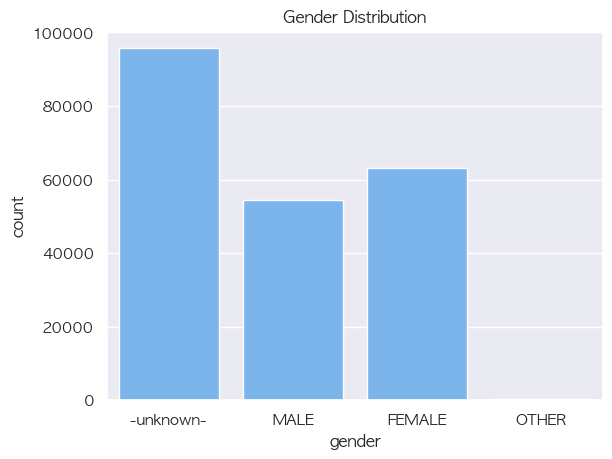

In [25]:
# 성별 분포 시각화
sns.countplot(data=users_df, x='gender', color='#69B4FF')
plt.title('Gender Distribution')
plt.show()

- `-unknown-` 이 가장 많았다.
- 남성보다는 여성 사용자가 많았으며 둘 다 적어도 50000명 이상을 차지하고 있다.

In [26]:
# 연령대 최댓값 
users_df['age'].max()

2014.0

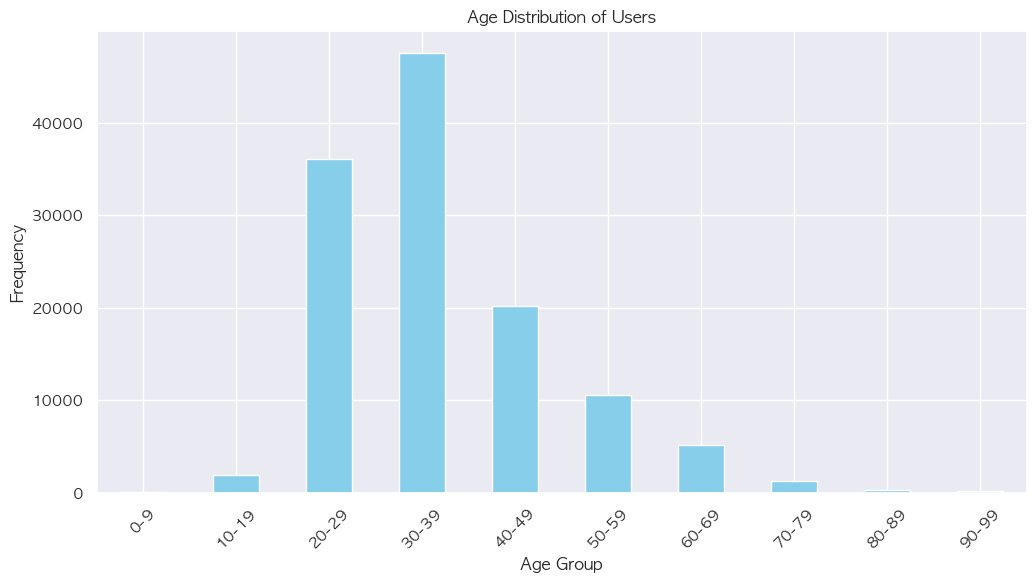

In [27]:
## 연령대 시각화

# age 컬럼의 결측치 제거 및 유효 범위 (0 ~ 100)로 필터링
age_filtered = users_df[(users_df['age'] >= 0) & (users_df['age'] <= 100)]['age'].dropna()

# 10세 단위로 나누기 위한 연령대 범위 설정
bins = list(range(0, 101, 10))

# 연령대를 나타내기 위한 레이블 설정
labels = [f'{i}-{i+9}' for i in bins[:-1]]

# age 컬럼을 10세 단위로 나누기
age_groups = pd.cut(age_filtered, bins=bins, labels=labels, right=False)

# 각 연령대의 빈도수 계산
age_group_counts = age_groups.value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age Distribution of Users')
plt.xticks(rotation=45)
plt.show()

- 사용자 중 30대가 가장 많은 비중을 차지하고 있음을 파악했다.
- 그 다음으로 많은 것은 20대, 40대 순
- 미성년자: 18세 미만은 에어비앤비 계정을 만들거나, 숙소·체험을 호스팅하거나, 에어비앤비를 통해 예약할 수 없으며, 성인을 동반하는 경우에만 숙소에 숙박하거나 체험에 참여할 수 있습니다.
- 위처럼 에어비엔비 나이 정책이 있음에도 불구하고, 해당 데이터가 미국 기준임을 감안했을 때 18세 이상부터는 성인이므로 18, 19세의 사용자에 한해서 값이 측정된 것으로 보인다.

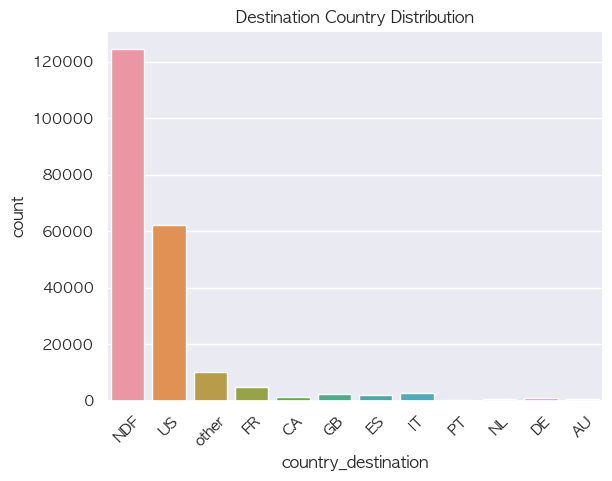

In [70]:
# 목적지 국가 분포 시각화
sns.countplot(data=users_df, x='country_destination')
plt.title('Destination Country Distribution')
plt.xticks(rotation=45)
plt.show()

- 미국 기준의 데이터라서 그런지 NDF(No Destination Found: 목적지 알 수 없음)다음으로 US(미국)가 가장 많이 가는 목적지인 것을 알 수 있었다.

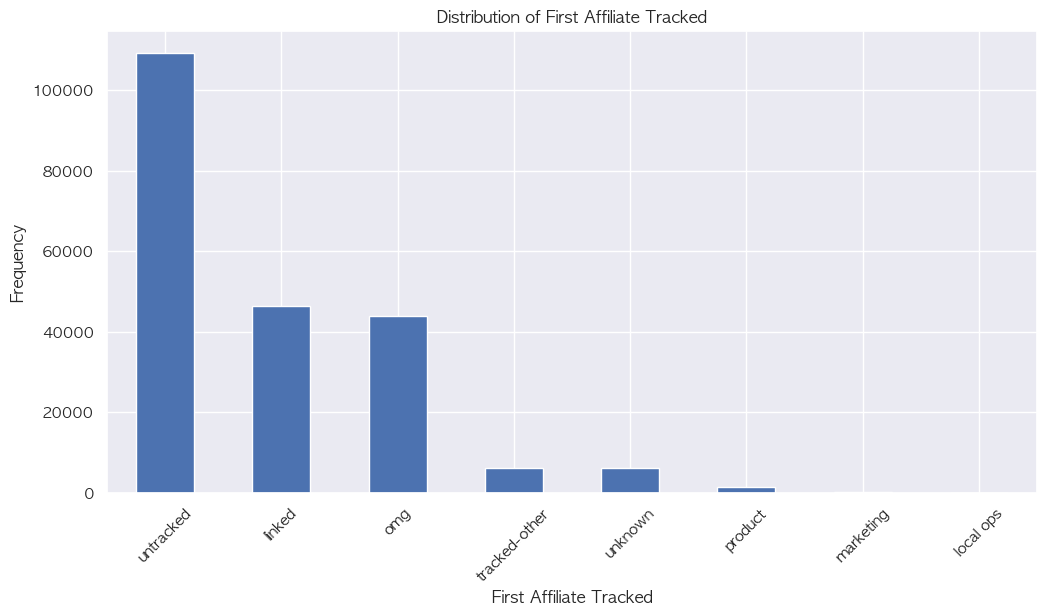

In [71]:
## 사용자가 가입 전에 처음으로 상호 작용한 마케팅

# first_affiliate_tracked 컬럼의 결측치를 'unknown'으로 대체
users_df['first_affiliate_tracked'] = users_df['first_affiliate_tracked'].fillna('unknown')

# first_affiliate_tracked 컬럼의 값별 빈도수 계산
affiliate_tracked_counts = users_df['first_affiliate_tracked'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
affiliate_tracked_counts.plot(kind='bar')
plt.xlabel('First Affiliate Tracked')
plt.ylabel('Frequency')
plt.title('Distribution of First Affiliate Tracked')
plt.xticks(rotation=45)
plt.show()

- 사용자가 가입 전에 처음으로 상호 작용한 마케팅에 대한 분포를 파악해본 결과, untracked(추적되지 않음)이 거의 대부분을 차지하는 것을 확인했다.
- 그 다음으로 많은 것은 linked와 omg였다.

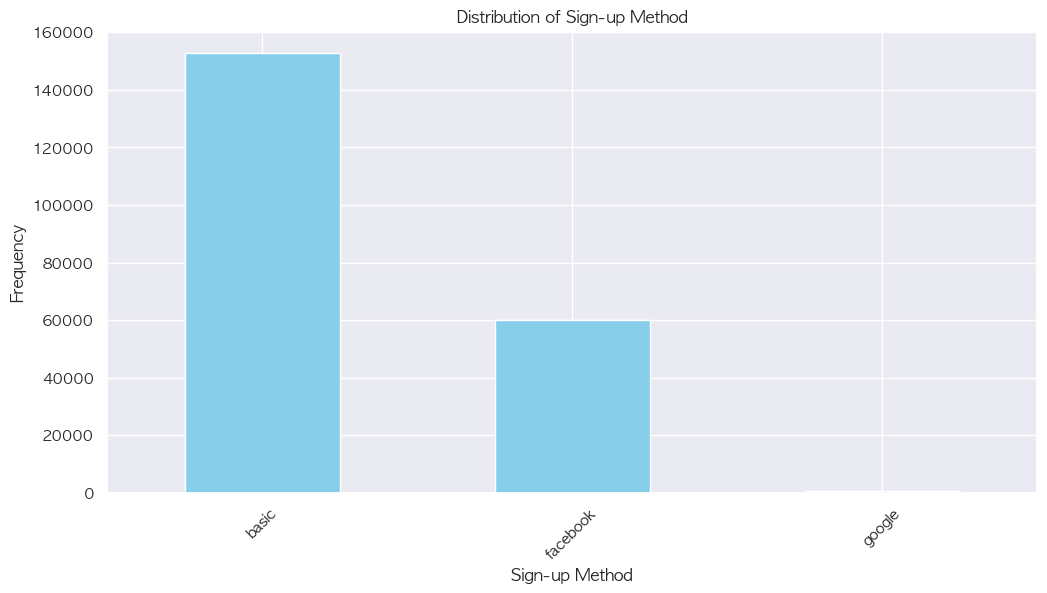

In [72]:
## 사용자 가입 방식 분포 파악

# signup_method 컬럼의 값별 빈도수 계산
signup_method_counts = users_df['signup_method'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
signup_method_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sign-up Method')
plt.ylabel('Frequency')
plt.title('Distribution of Sign-up Method')
plt.xticks(rotation=45)
plt.show()

- 사용자 가입방식의 분포를 파악한 결과 가장 많은 것은 basic(기존 회원가입 방식)이었다. 추가적인 과정 없이 가장 간편하게 할 수 있는 방식이어서 가장 많이 활용하는 것으로 보인다.
- 그 다음으로 많은 비중을 차지한 방식은 facebook 이었다. 가입 시 sns 연동 과정만 거치면, 로그인할 때 'facebook으로 로그인' 버튼만 클릭하면 아이디와 패스워드 기입 없이 빠르게 접근 가능하기 때문에 그 다음으로 많이 활용할 가능성이 높다. 
페이스북 로그인 방식을 사용하는 사용자의 경우 접속 기기가 데스크탑 보다는 모바일 환경일 가능성도 추론해볼 수 있을 것 같다.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


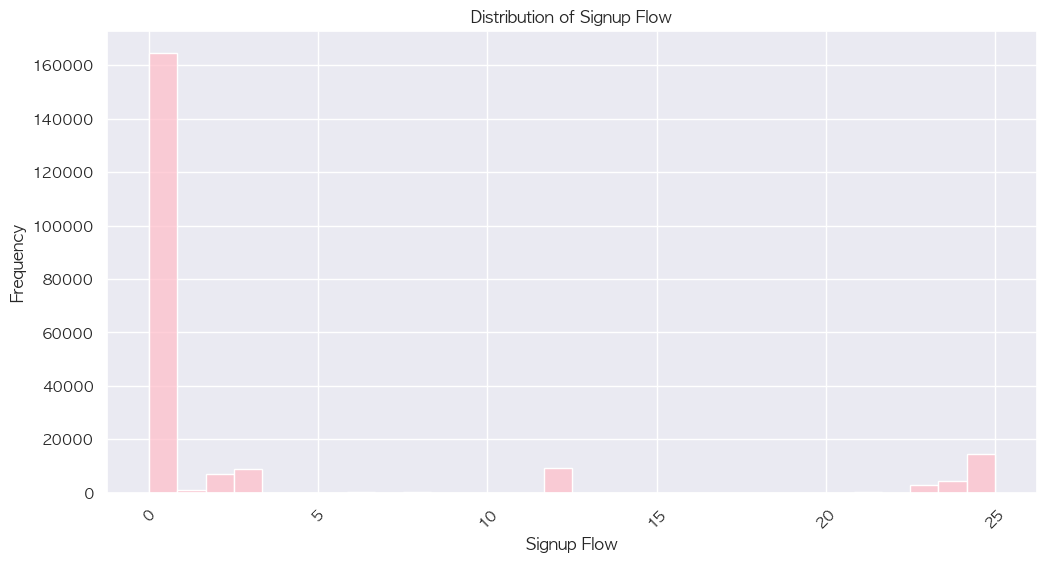

In [73]:
## 사용자가 가입하기 위해 온 페이지 
# signup_flow 컬럼의 히스토그램 시각화
plt.figure(figsize=(12, 6))
sns.histplot(users_df['signup_flow'], bins=30, kde=False, color='pink')
plt.xlabel('Signup Flow')
plt.ylabel('Frequency')
plt.title('Distribution of Signup Flow')
plt.xticks(rotation=45)
plt.show()

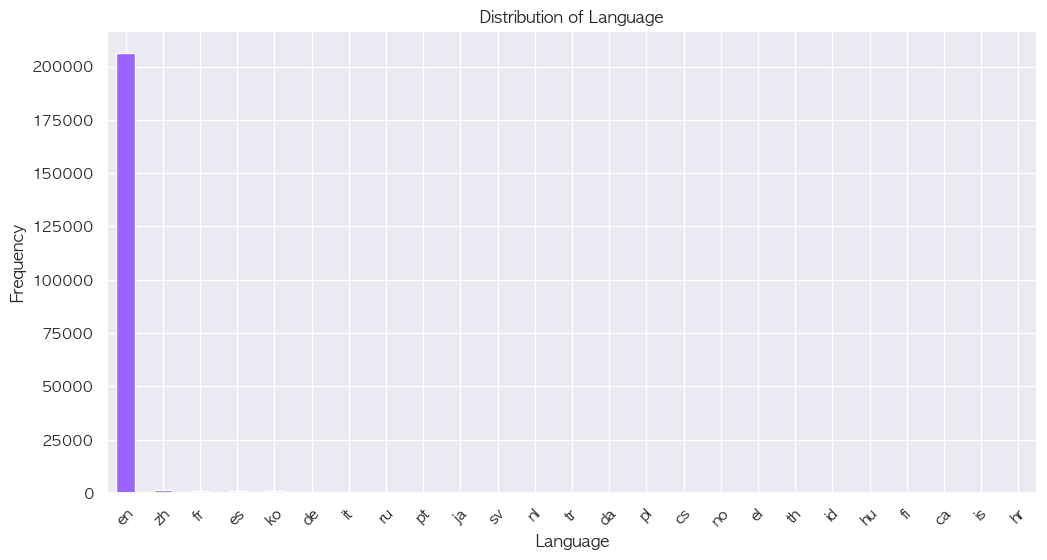

In [74]:
## 선호하는 언어 분포 파악

# language 컬럼의 값별 빈도수 계산
language_counts = users_df['language'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
language_counts.plot(kind='bar', color='#9B63FF')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.title('Distribution of Language')
plt.xticks(rotation=45)
plt.show()

→ 사용자 대부분이 영어를 선호하는 것을 알 수 있다.

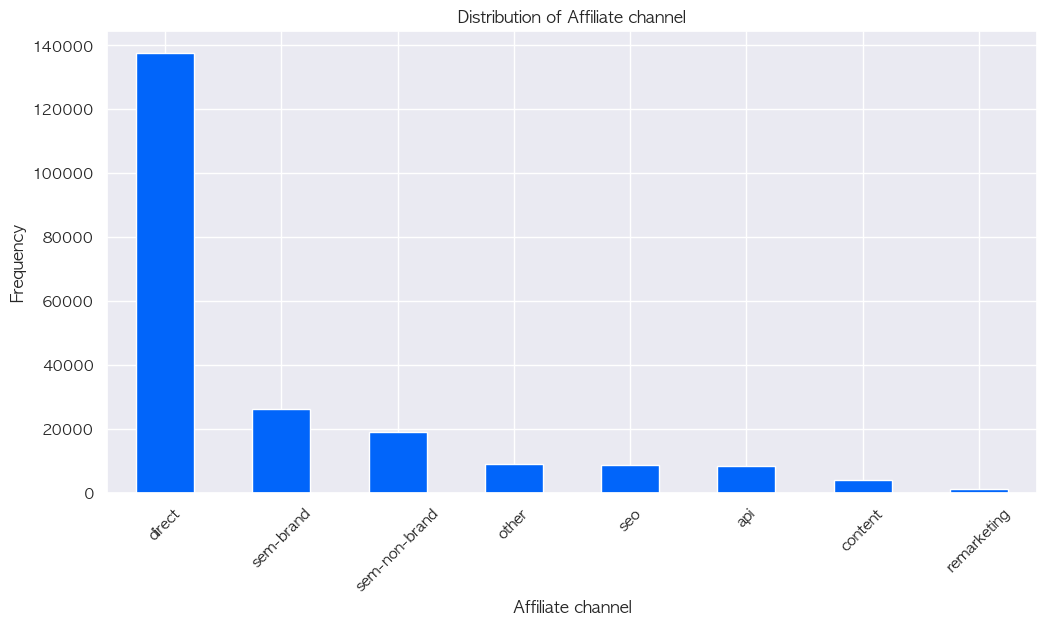

In [95]:
## 유료 마케팅 종류(affiliate_channel) 분포 파악

# affiliate_channel 컬럼의 값별 빈도수 계산
affiliate_channel_counts = users_df['affiliate_channel'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
affiliate_channel_counts.plot(kind='bar', color='#0165FA')
plt.xlabel('Affiliate channel')
plt.ylabel('Frequency')
plt.title('Distribution of Affiliate channel')
plt.xticks(rotation=45)
plt.show()

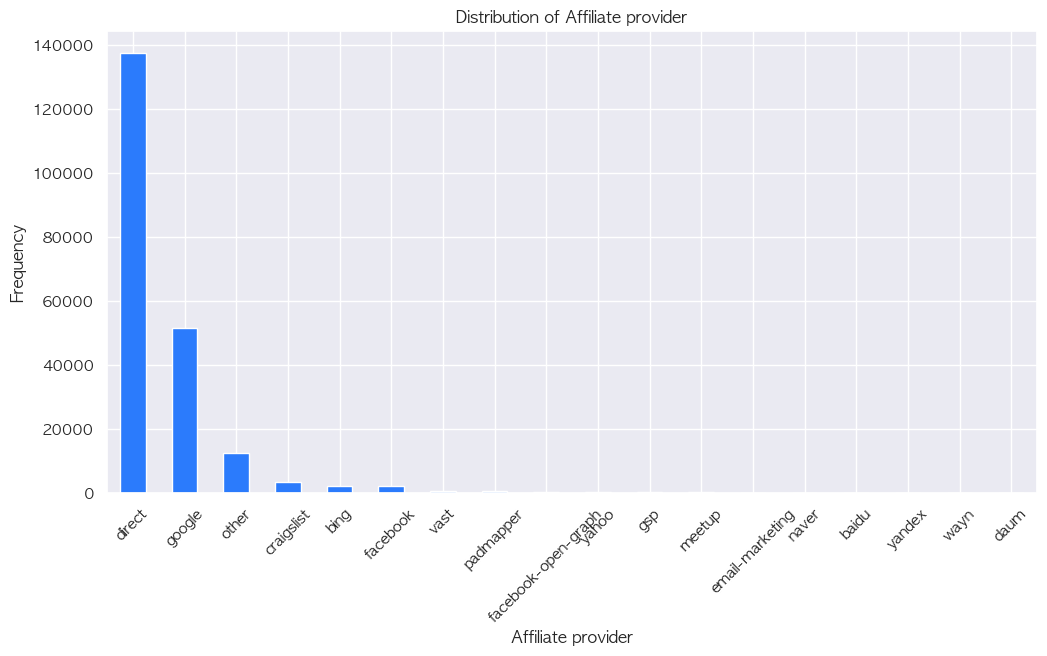

In [96]:
## 마케팅이 진행된 곳(affiliate_provider) 분포 파악

# affiliate_provider 컬럼의 값별 빈도수 계산
affiliate_provider_counts = users_df['affiliate_provider'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
affiliate_provider_counts.plot(kind='bar', color='#2B7BFC')
plt.xlabel('Affiliate provider')
plt.ylabel('Frequency')
plt.title('Distribution of Affiliate provider')
plt.xticks(rotation=45)
plt.show()

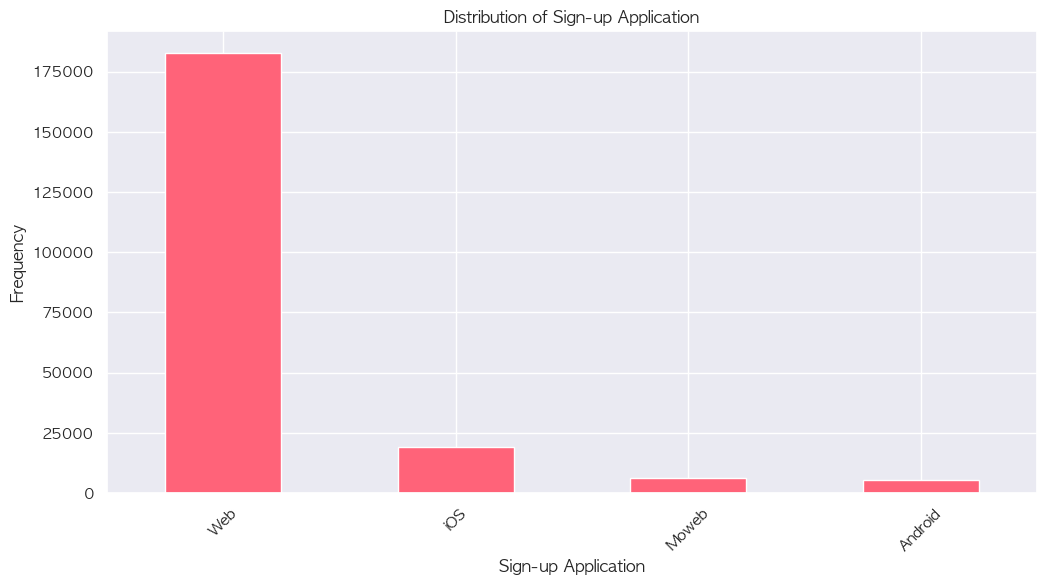

In [97]:
## 가입한 애플리케이션 (signup_app) 분포 파악

# signup_app 컬럼의 값별 빈도수 계산
signup_app_counts = users_df['signup_app'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
signup_app_counts.plot(kind='bar', color='#FF6379')
plt.xlabel('Sign-up Application')
plt.ylabel('Frequency')
plt.title('Distribution of Sign-up Application')
plt.xticks(rotation=45)
plt.show()

→ 가입 방식은 모바일 환경보다는 웹에서 가입하는 사용자가 압도적으로 많았다.

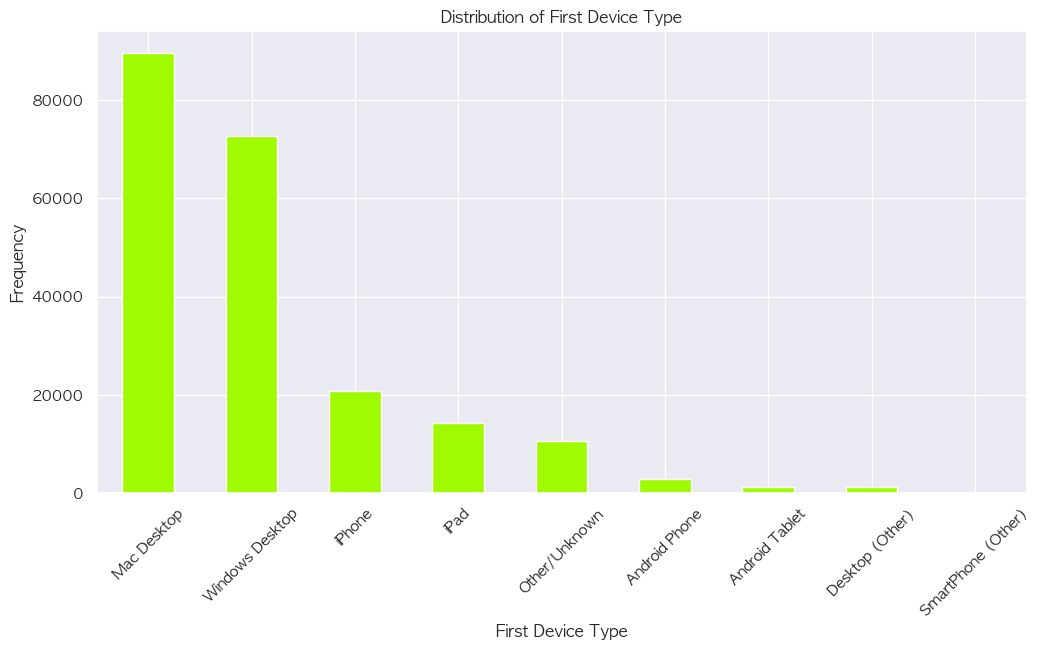

In [99]:
## 처음 접속한 기기 종류(first_device_type) 분포 파악

# first_device_type 컬럼의 값별 빈도수 계산
first_device_type_counts = users_df['first_device_type'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
first_device_type_counts.plot(kind='bar', color='#A0FA00')
plt.xlabel('First Device Type')
plt.ylabel('Frequency')
plt.title('Distribution of First Device Type')
plt.xticks(rotation=45)
plt.show()

- 에어비엔비에 처음 접속한 기기의 종류로는 Mac 운영체제의 데스크탑이 가장 많았다.
- 그 다음으로는 Windows 운영체제의 데스크 탑이었다.
- 생각보다 웹과 모바일 기기(iPhone, iPad 등)간의 차이가 약 50,000건 이상으로 컷다.

→ 숙박 예약의 경우 예약자 정보, 투숙객 정보 등 중요한 내용을 기입해야하기 때문에 모바일보다는 화면이 큰 데스크탑으로 접속하는 것을 선호하는 것 같다.

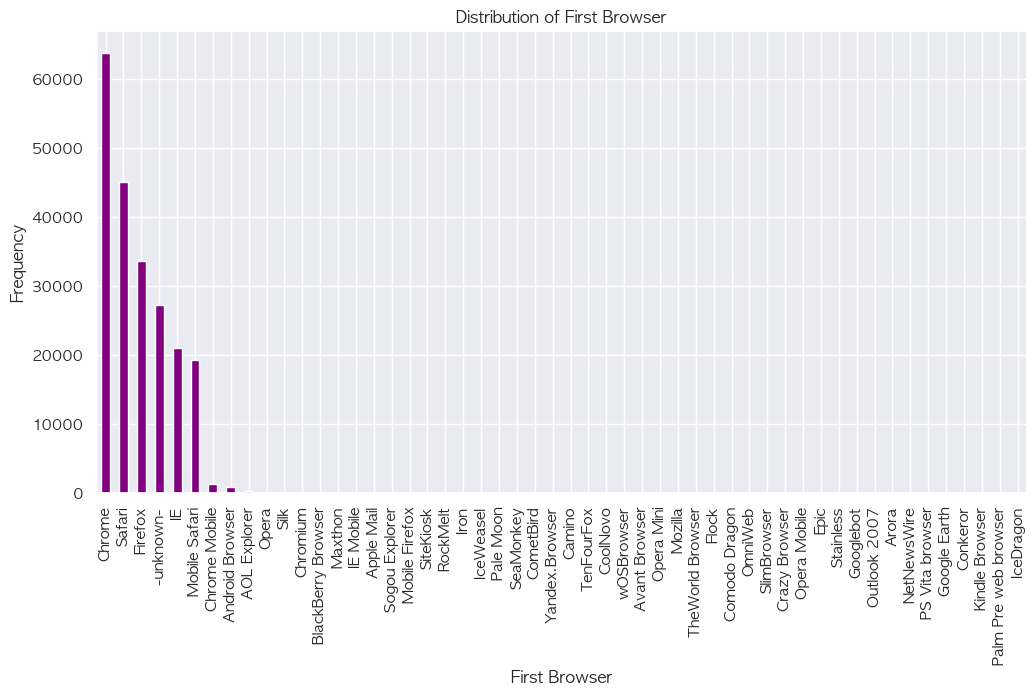

In [105]:
# first_browser 컬럼의 값별 빈도수 계산
first_browser_counts = users_df['first_browser'].value_counts()

# 개수가 0인 범주 확인 (참고로 개수가 0인 값은 value_counts() 결과에 포함되지 않음)
# 따라서 이를 확인하는 것은 의미가 없으므로, 바로 빈도수를 기준으로 제외하는 작업을 진행함
non_zero_first_browser_counts = first_browser_counts[first_browser_counts > 0]

plt.figure(figsize=(12, 6))
non_zero_first_browser_counts.plot(kind='bar', color='purple')
plt.xlabel('First Browser')
plt.ylabel('Frequency')
plt.title('Distribution of First Browser')
plt.xticks(rotation=90)
plt.show()

- 웹으로 가입한 유저가 가장 많았는데, 사용한 최초 브라우저로는 chrome을 가장 많이 이용했다.
- 그 다음으로는 Safari, Firefox 순으로 많았다.

In [103]:
first_browser_counts

first_browser
Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
CometBird                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Avant Browser               4
Opera Mini                  4
Mozilla                   

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'untracked'),
  Text(1, 0, 'omg'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'linked'),
  Text(4, 0, 'tracked-other'),
  Text(5, 0, 'product'),
  Text(6, 0, 'marketing'),
  Text(7, 0, 'local ops')])

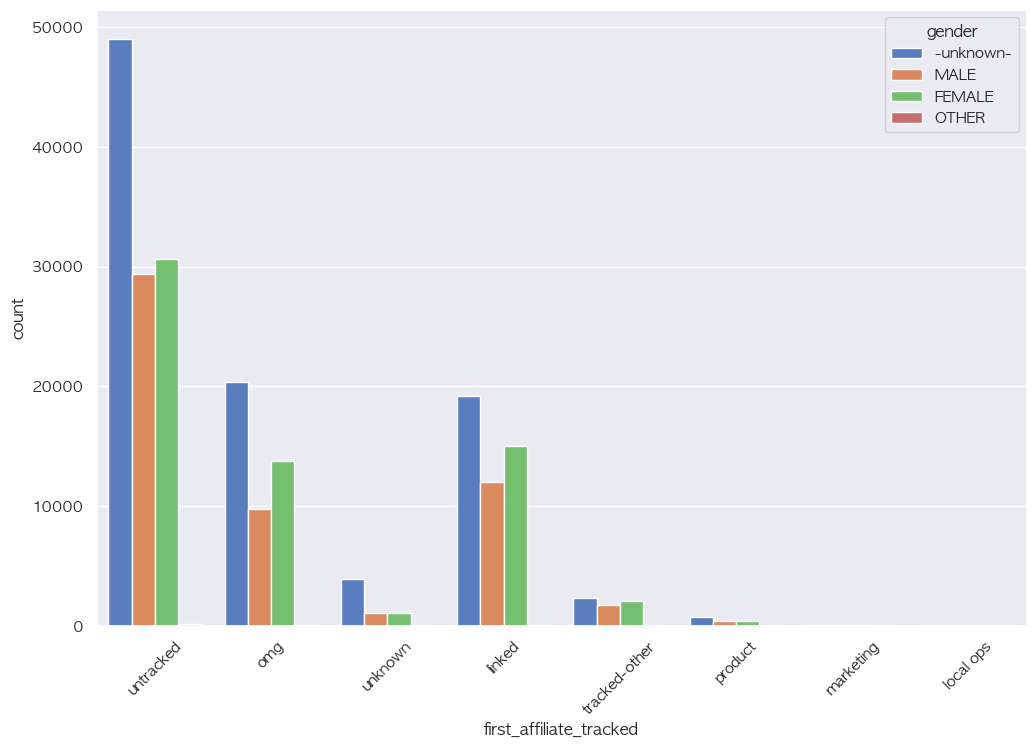

In [36]:
## 사용자의 성별에 따른 가입 전 최초 상호 작용한 마케팅 분포 파악

plt.figure(figsize=(12, 8))
sns.countplot(x=users_df['first_affiliate_tracked'],
              hue='gender',
              data=users_df)
plt.xticks(rotation=45)

### 데이터타입이 datetime인 컬럼에 대한 추세 파악
- date_account_created
- timestamp_first_active
- date_first_booking

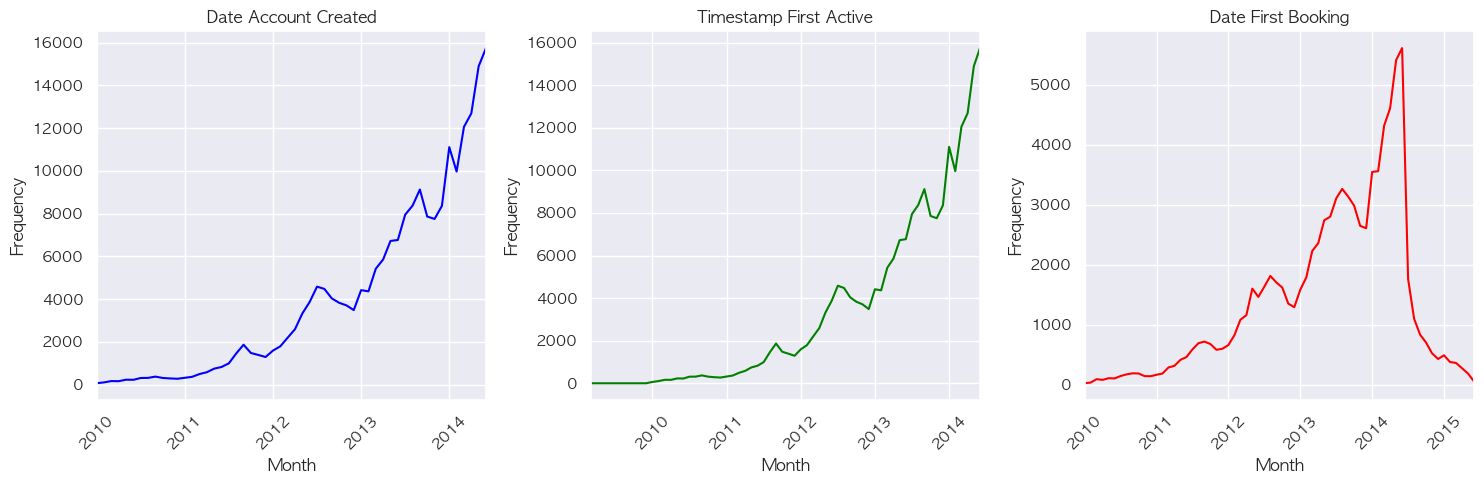

In [76]:
# 각 컬럼별 월 단위로 데이터 카운트
dac_counts = users_df['date_account_created'].dt.to_period('M').value_counts().sort_index()
tfa_counts = users_df['timestamp_first_active'].dt.to_period('M').value_counts().sort_index()
dfb_counts = users_df['date_first_booking'].dt.to_period('M').value_counts().sort_index()

# 시각화
plt.figure(figsize=(15, 5))

# date_account_created
plt.subplot(1, 3, 1)
dac_counts.plot(kind='line', color='blue')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Date Account Created')
plt.xticks(rotation=45)

# timestamp_first_active
plt.subplot(1, 3, 2)
tfa_counts.plot(kind='line', color='green')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Timestamp First Active')
plt.xticks(rotation=45)

# date_first_booking
plt.subplot(1, 3, 3)
dfb_counts.plot(kind='line', color='red')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Date First Booking')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

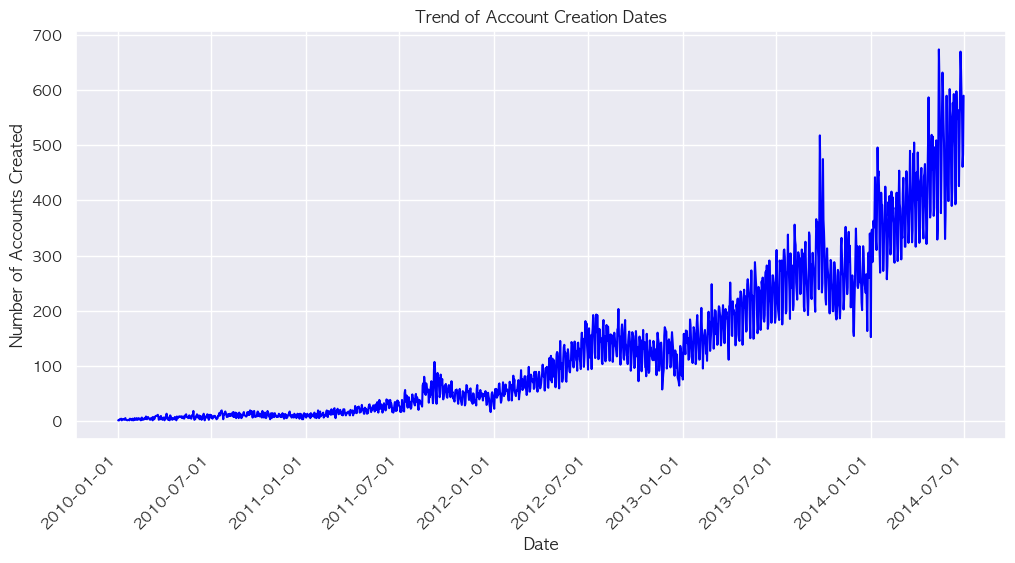

In [84]:
## 계정 생성일(date_account_created) 추세 파악

# date_account_created의 월별 빈도 계산
date_account_created_counts = users_df['date_account_created'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
date_account_created_counts.plot(kind='line', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Accounts Created')
plt.title('Trend of Account Creation Dates')
plt.xticks(pd.date_range(start='2010-01-01', end='2015-01-01', freq='6M').strftime('%Y-%m'), rotation=45)
plt.grid(True)
plt.show()

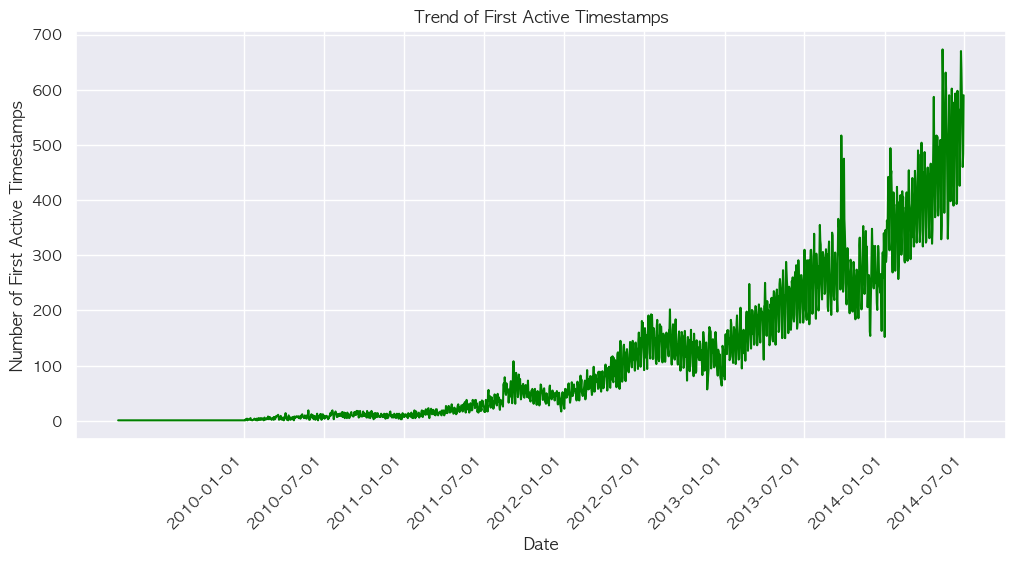

In [92]:
# 첫 번째 활동의 타임스탬프(timestamp_first_active) 추세 파악

# timestamp_first_active의 월별 빈도 계산
timestamp_first_active_counts = users_df['timestamp_first_active'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
timestamp_first_active_counts.plot(kind='line', color='green')
plt.xlabel('Date')
plt.ylabel('Number of First Active Timestamps')
plt.title('Trend of First Active Timestamps')
plt.xticks(pd.date_range(start='2010-01-01', end='2015-01-01', freq='6M').strftime('%Y-%m'), rotation=45)
plt.grid(True)
plt.show()

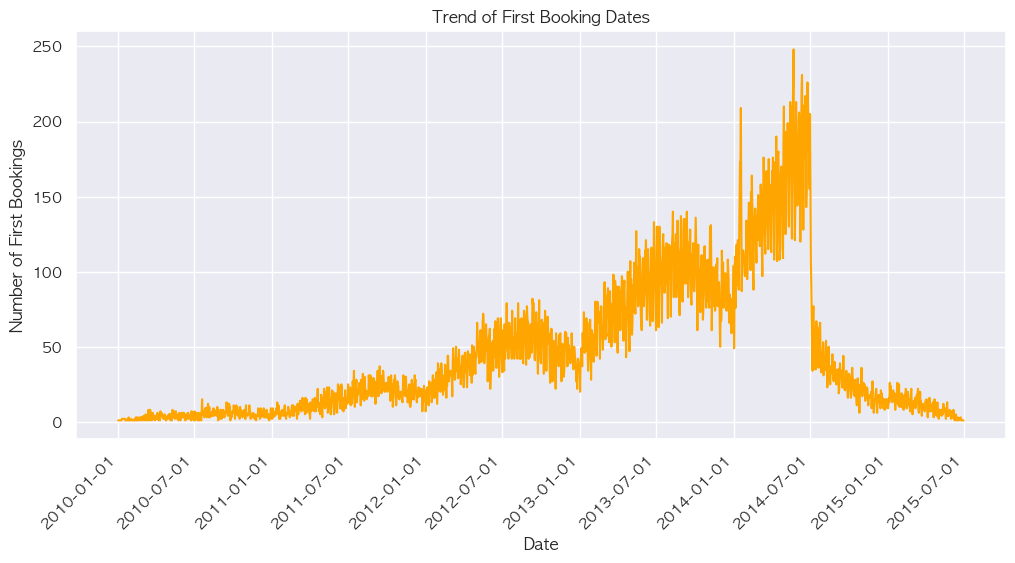

In [94]:
## 첫 예약일 (date_first_booking) 추세 파악

# date_first_booking의 월별 빈도 계산
date_first_booking_counts = users_df['date_first_booking'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
date_first_booking_counts.plot(kind='line', color='orange')
plt.xlabel('Date')
plt.ylabel('Number of First Bookings')
plt.title('Trend of First Booking Dates')
plt.xticks(pd.date_range(start='2010-01-01', end='2016-01-01', freq='6M').strftime('%Y-%m'), rotation=45)
plt.grid(True)
plt.show()

첫 예약일의 경우 2014.07에 급격히 떨어지는 지점을 발견했다.
<br>
<br>

#### 2014년 FIFA 월드컵이 원인?
2014년 6월 12일부터 7월 13일까지 브라질에서 FIFA 월드컵이 열렸다. 많은 사람들이 여행 계획을 변경하거나 월드컵과 관련된 활동에 집중했을 가능성이 크다.
월드컵 기간 동안 여행보다는 스포츠 이벤트에 집중하면서 새로운 예약이 줄어들었을 수도 있다.

## 4-2. sessions_df EDA

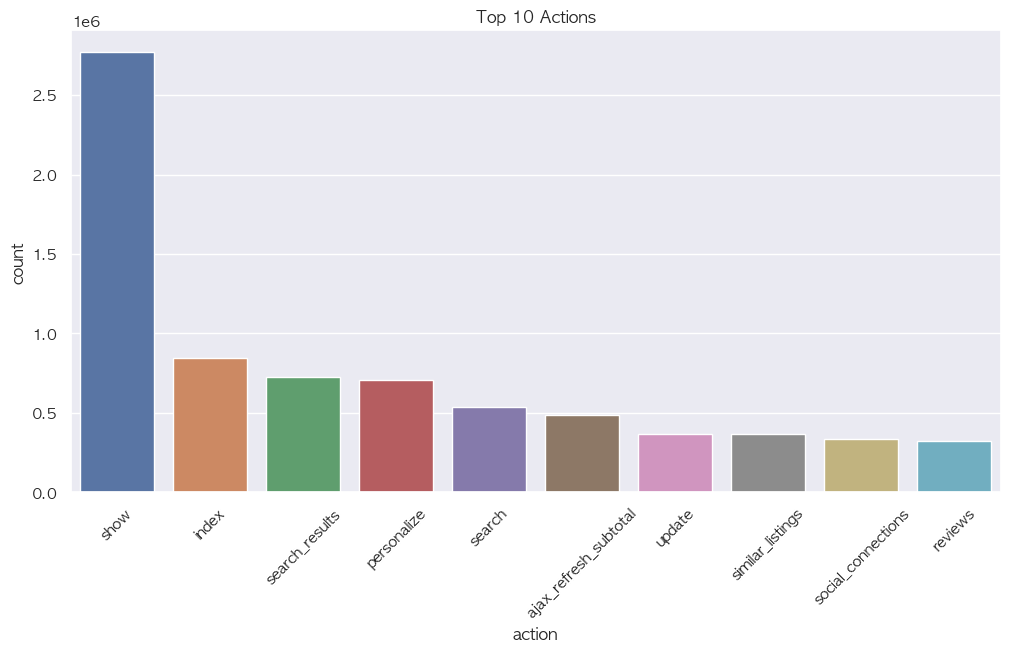

In [108]:
# 상위 10개 활동(action)에 대한 분포 파악

plt.figure(figsize=(12, 6))
sns.countplot(data=sessions_df, x='action', order=sessions_df['action'].value_counts().index[:10])
plt.title('Top 10 Actions')
plt.xticks(rotation=45)
plt.show()

- 에어비엔비 세션에 접속한 상태에서 사용자들이 가장 많이 한 활동 중 상위 10개를 추출해 시각화해보았다.
- 가장 많은 시간을 보낸 활동은 show(둘러보기)였다.
- 가장 적은 시간을 보낸 활동은 reviews(후기 남기기)였다. 

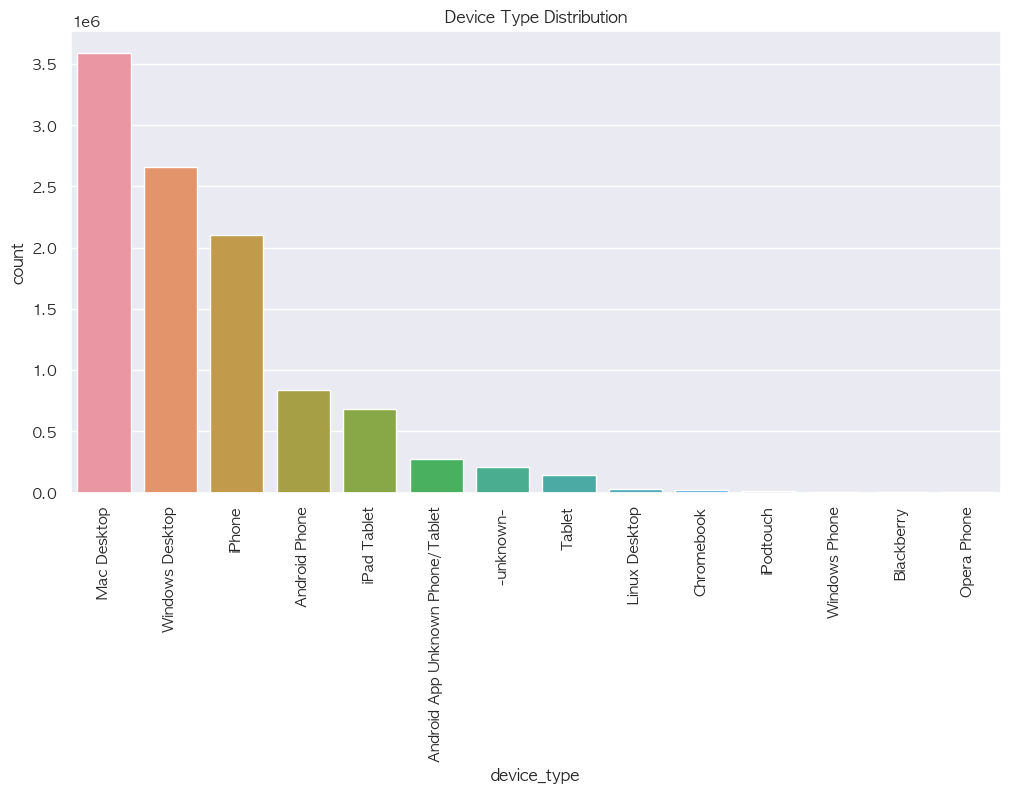

In [109]:
# 기기 유형(device_type) 분포 파악

plt.figure(figsize=(12, 6))
sns.countplot(data=sessions_df, x='device_type', order=sessions_df['device_type'].value_counts().index)
plt.title('Device Type Distribution')
plt.xticks(rotation=90)
plt.show()

- 기기 유형의 경우 Mac Descktop이 가장 많은 비중을 차지하였고, 그 다음으로는 Windows Desktop이었다.
- 모바일 환경보다 PC 환경을 더 선호하는 사용자가 많은 것을 알 수 있었다.

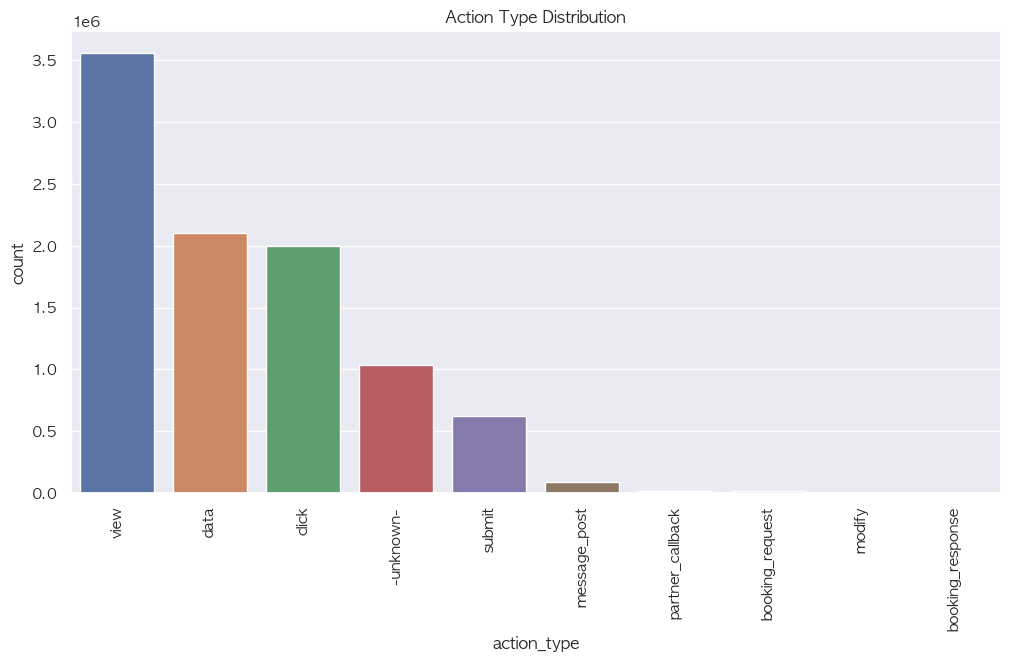

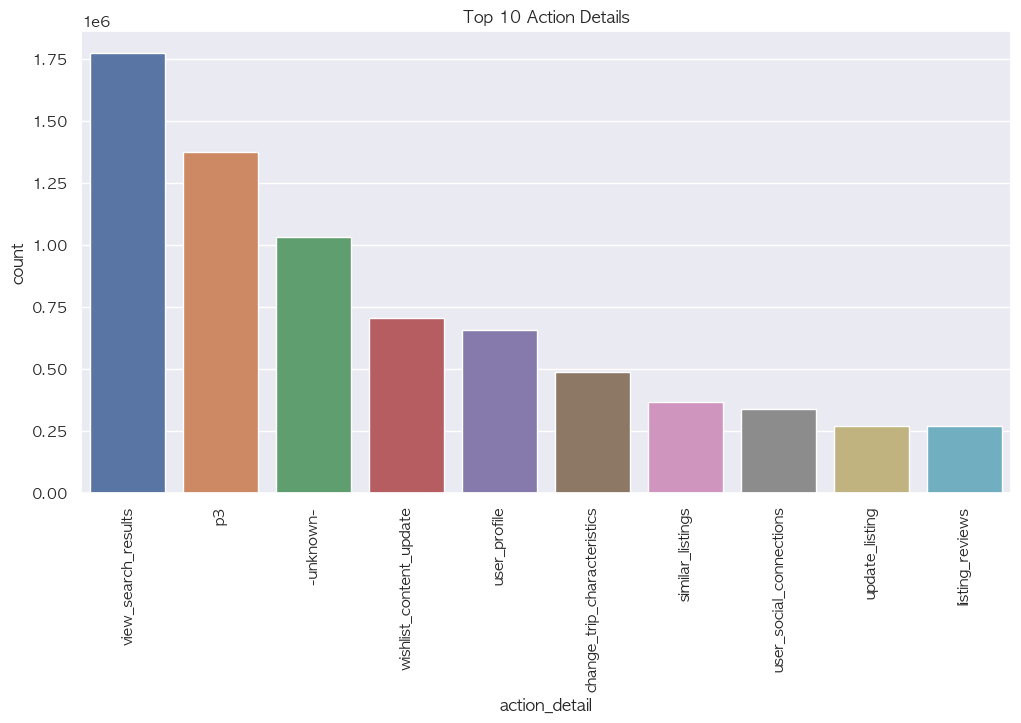

In [110]:
# 활동 유형(action_type) 분포 파악
plt.figure(figsize=(12, 6))
sns.countplot(data=sessions_df, x='action_type', order=sessions_df['action_type'].value_counts().index)
plt.title('Action Type Distribution')
plt.xticks(rotation=90)
plt.show()

# 활동 상세 내용(action_detail) 분포 파악
plt.figure(figsize=(12, 6))
sns.countplot(data=sessions_df, x='action_detail', order=sessions_df['action_detail'].value_counts().index[:10])
plt.title('Top 10 Action Details')
plt.xticks(rotation=90)
plt.show()

- action과 마찬가지로 action_type과 action_detail에서도 가장 많은 비중을 차지한 활동은 view(둘러보기)활동이었다.

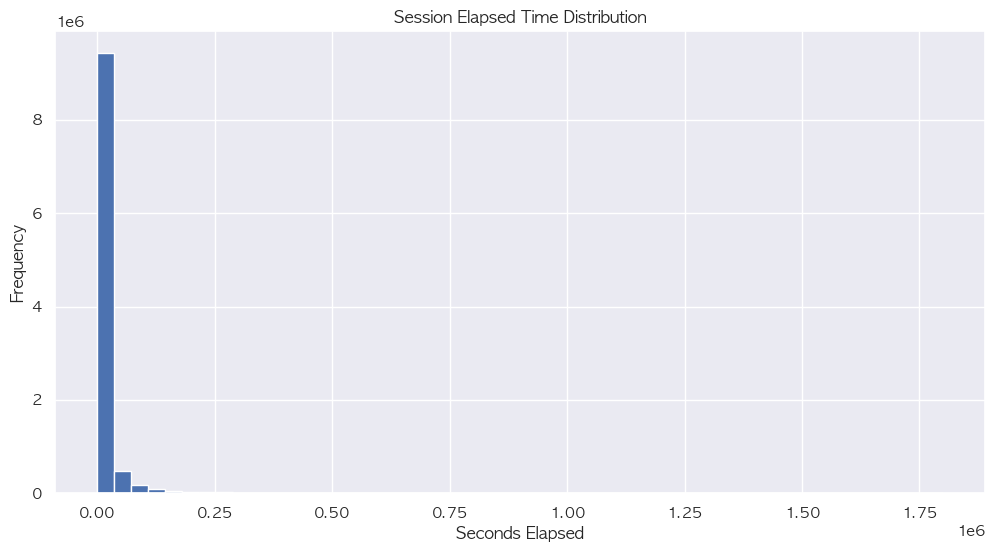

In [111]:
# 세션 경과 시간(secs_elapsed) 분포 파악
plt.figure(figsize=(12, 6))
plt.hist(sessions_df['secs_elapsed'], bins=50)
plt.title('Session Elapsed Time Distribution')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Frequency')
plt.show()

- 세션에 머무른 시간은 거의 0.25초를 넘기지 않는 활동이 대부분인 것을 알 수 있다.

### 사용자별 액션 분석

In [178]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [179]:
# 세션 데이터를 사용자id별로 그룹화 + 각 사용자의 액션 목록 생성
df_agg_session = sessions_df.groupby('user_id').agg(lambda x: x.tolist())

# 사용자별로 가장 빈번한 액션, 액션 타입, 기기 타입 정의
df_agg_session[['most_freq_action','most_freq_action_type','most_freq_device_type']] = sessions_df[['user_id','action','action_type','device_type']].groupby('user_id').agg(lambda x: dict(enumerate(set(pd.Series.mode(x)))))

# 가장 빈번한 액션, 액션 타입, 기기 타입을 별도의 컬럼으로 저장
df_agg_session['most_freq_action'] = df_agg_session['most_freq_action'].map(lambda x: x.get(0))
df_agg_session['most_freq_action_type'] = df_agg_session['most_freq_action_type'].map(lambda x: x.get(0))
df_agg_session['most_freq_device_type'] = df_agg_session['most_freq_device_type'].map(lambda x: x.get(0))

# 사용자별로 서로 다른 액션, 액션 타입, 기기 타입의 개수를 계산
df_agg_session[['no_diff_actions','no_diff_action_types','no_diff_devices']] = sessions_df[['user_id','action','action_type','device_type']].groupby('user_id').agg(lambda x: len(set(x)))

# 사용자별 총 세션 시간을 계산
df_agg_session['total_session_time'] = sessions_df[['user_id','secs_elapsed']].groupby('user_id').sum()

df_agg_session

,action,action_type,action_detail,device_type,secs_elapsed,most_freq_action,most_freq_action_type,most_freq_device_type,no_diff_actions,no_diff_action_types,no_diff_devices,total_session_time
user_id,,,,,,,,,,,,
00023iyk9l,"[index, dashboard, header_userpic, dashboard, ...","[view, view, data, view, partner_callback, mes...","[view_search_results, dashboard, header_userpi...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[20438.0, 787.0, 850.0, 934.0, nan, 129817.0, ...",show,view,Mac Desktop,14,7,2,867896.0
0010k6l0om,"[search_results, show, personalize, show, sear...","[click, view, data, nan, click, click, nan, da...","[view_search_results, p3, wishlist_content_upd...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,...",show,view,Mac Desktop,11,6,1,586543.0
001wyh0pz8,"[search, search, search, show, social_connecti...","[click, click, click, view, data, -unknown-, v...","[view_search_results, view_search_results, vie...","[Android App Unknown Phone/Tablet, Android App...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ...",search,click,Android App Unknown Phone/Tablet,10,6,1,282965.0
0028jgx1x1,"[show, reviews, show, search, show, search, re...","[view, data, view, click, view, click, data, s...","[user_profile, listing_reviews, p3, view_searc...","[-unknown-, -unknown-, -unknown-, -unknown-, -...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0...",show,view,-unknown-,5,5,2,297010.0
002qnbzfs5,"[social_connections, payment_methods, create, ...","[data, -unknown-, -unknown-, view, data, data,...","[user_social_connections, -unknown-, -unknown-...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782...",show,view,iPhone,26,8,2,6487080.0
...,...,...,...,...,...,...,...,...,...,...,...,...
zzxox7jnrx,"[identity, kba, kba_update, kba_update, popula...","[-unknown-, -unknown-, -unknown-, -unknown-, -...","[-unknown-, -unknown-, -unknown-, -unknown-, -...","[Windows Desktop, Windows Desktop, Windows Des...","[1338.0, 10115.0, 23802.0, 16951.0, 49938.0, 7...",search_results,click,Windows Desktop,28,7,1,639436.0
zzy7t0y9cm,"[personalize, header_userpic, create, personal...","[data, data, submit, data, view, click, click,...","[wishlist_content_update, header_userpic, crea...","[Windows Desktop, Windows Desktop, Windows Des...","[501.0, 3671.0, nan, 42612.0, 697.0, 25616.0, ...",personalize,data,Windows Desktop,7,5,1,73771.0
zzysuoqg6x,"[hosting_social_proof, create, header_userpic]","[-unknown-, submit, data]","[-unknown-, create_user, header_userpic]","[Windows Desktop, Windows Desktop, Windows Des...","[1533.0, nan, 198.0]",create,data,Windows Desktop,3,3,1,1731.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

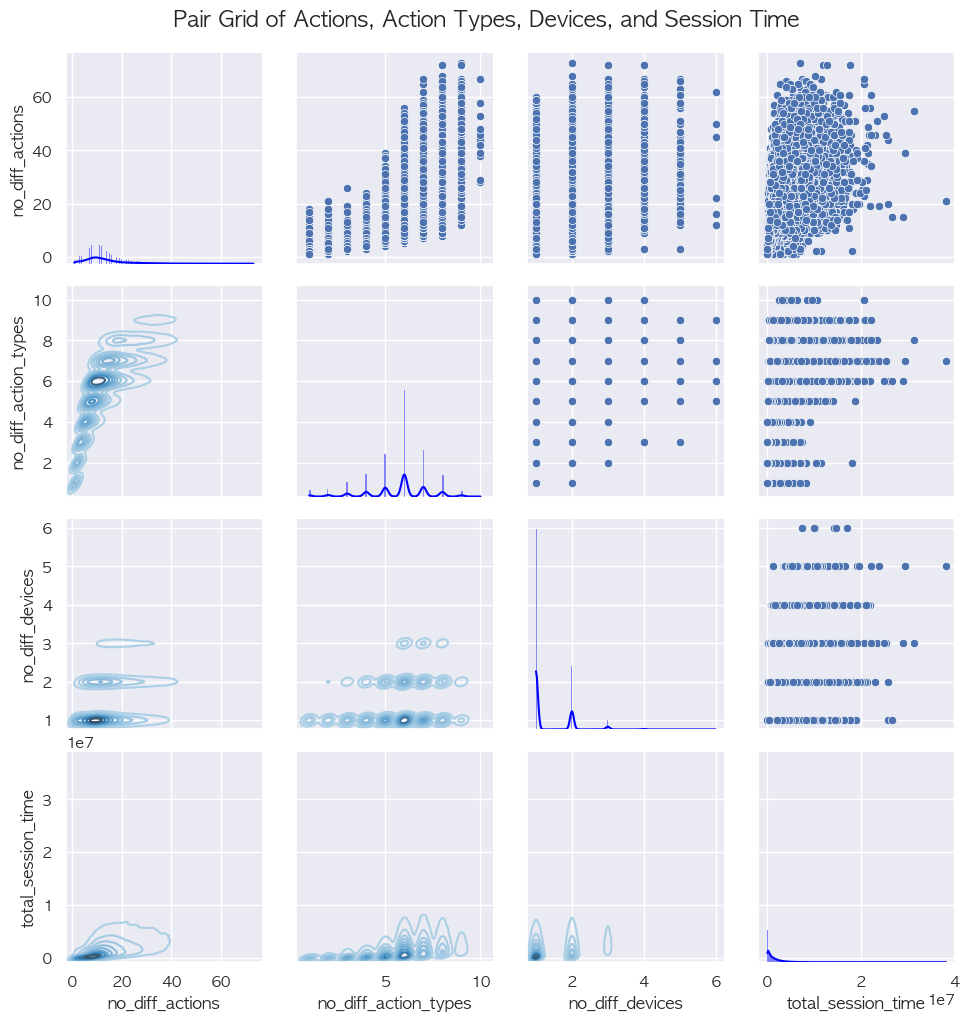

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화할 데이터프레임
df_visualize = df_agg_session[['no_diff_actions', 'no_diff_action_types', 'no_diff_devices', 'total_session_time']]

# Pair Grid scatter plot
g = sns.PairGrid(df_visualize)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.histplot, kde=True, color="blue")

# 그래프 제목 설정
plt.suptitle('Pair Grid of Actions, Action Types, Devices, and Session Time', y=1.02, fontsize=16)
plt.show()


## 4-3. user_df + sessions_df 병합

In [112]:
# 사용자 데이터와 세션 데이터 결합
merged_df = pd.merge(users_df, sessions_df, how='left', left_on='id', right_on='user_id')

# 결합된 데이터의 기본 정보 확인
print(merged_df.info())

# 결합된 데이터의 첫 몇 행을 확인
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677593 entries, 0 to 5677592
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       object        
 1   date_account_created     datetime64[ns]
 2   timestamp_first_active   datetime64[ns]
 3   date_first_booking       datetime64[ns]
 4   gender                   object        
 5   age                      float64       
 6   signup_method            object        
 7   signup_flow              int64         
 8   language                 object        
 9   affiliate_channel        object        
 10  affiliate_provider       object        
 11  first_affiliate_tracked  object        
 12  signup_app               object        
 13  first_device_type        object        
 14  first_browser            object        
 15  country_destination      object        
 16  user_id                  object        
 17  action                   ob

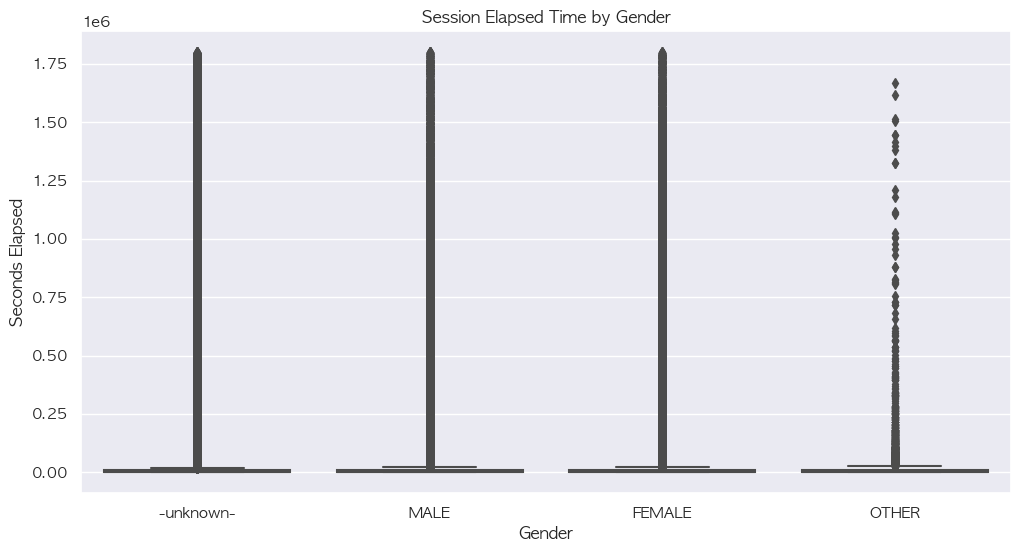

In [113]:
# 사용자 성별에 따른 세션 경과 시간 분포
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='gender', y='secs_elapsed')
plt.title('Session Elapsed Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Seconds Elapsed')
plt.show()

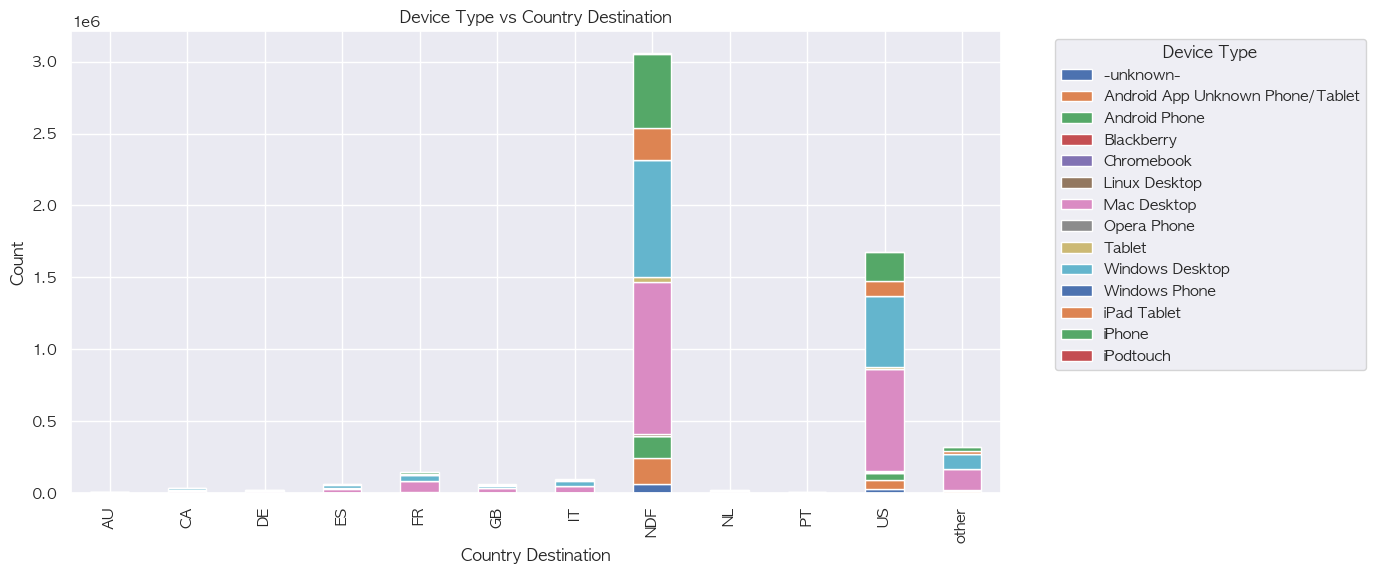

In [114]:
# 목적지 국가와 기기 유형의 관계 시각화
device_country = pd.crosstab(merged_df['country_destination'], merged_df['device_type'])
device_country.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Device Type vs Country Destination')
plt.xlabel('Country Destination')
plt.ylabel('Count')
plt.legend(title='Device Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 4-4. 추가 분석

### 재방문율
: 첫 예약 이후에 다시 예약을 하는 사용자의 비율

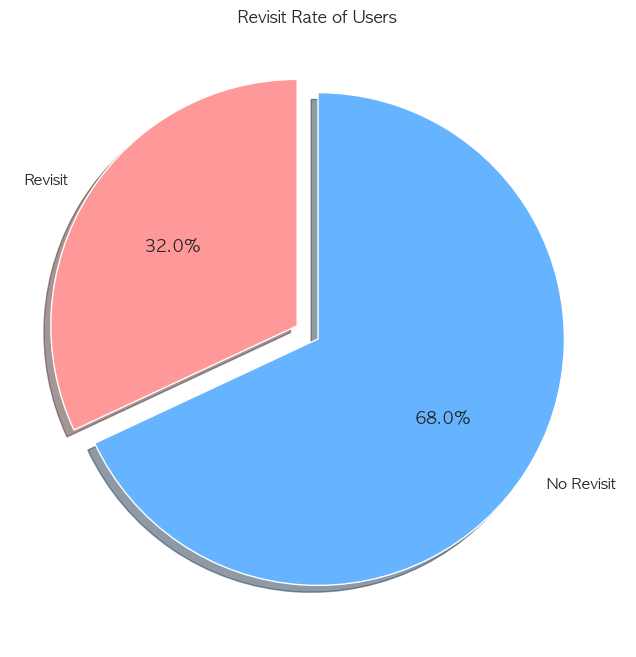

In [182]:
# 필요한 컬럼 추출
df = merged_df[['id', 'date_first_booking']]

# 첫 예약이 있는 사용자 추출
first_booking_users = df.dropna(subset=['date_first_booking'])

# 첫 예약 후 다시 예약한 사용자 추출
repeat_booking_users = first_booking_users.groupby('id').filter(lambda x: len(x) > 1)

# 재방문율 계산
total_users = first_booking_users['id'].nunique()
repeat_users = repeat_booking_users['id'].nunique()
revisit_rate = (repeat_users / total_users) * 100

# 재방문율 시각화
labels = ['Revisit', 'No Revisit']
sizes = [revisit_rate, 100 - revisit_rate]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # 첫 번째 조각을 약간 돌출시킴

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Revisit Rate of Users')
plt.show()

- 재방문 한 사람보다는 재방문하지 않는 사람의 비율이 더 높았다.

→ 시간에 따라서 재방문율이 어떤 추세를 갖고있는지 파악해보았다.

/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1771/3825215714.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_booking_users['first_booking_month'] = first_booking_users['date_first_booking'].dt.to_period('M')


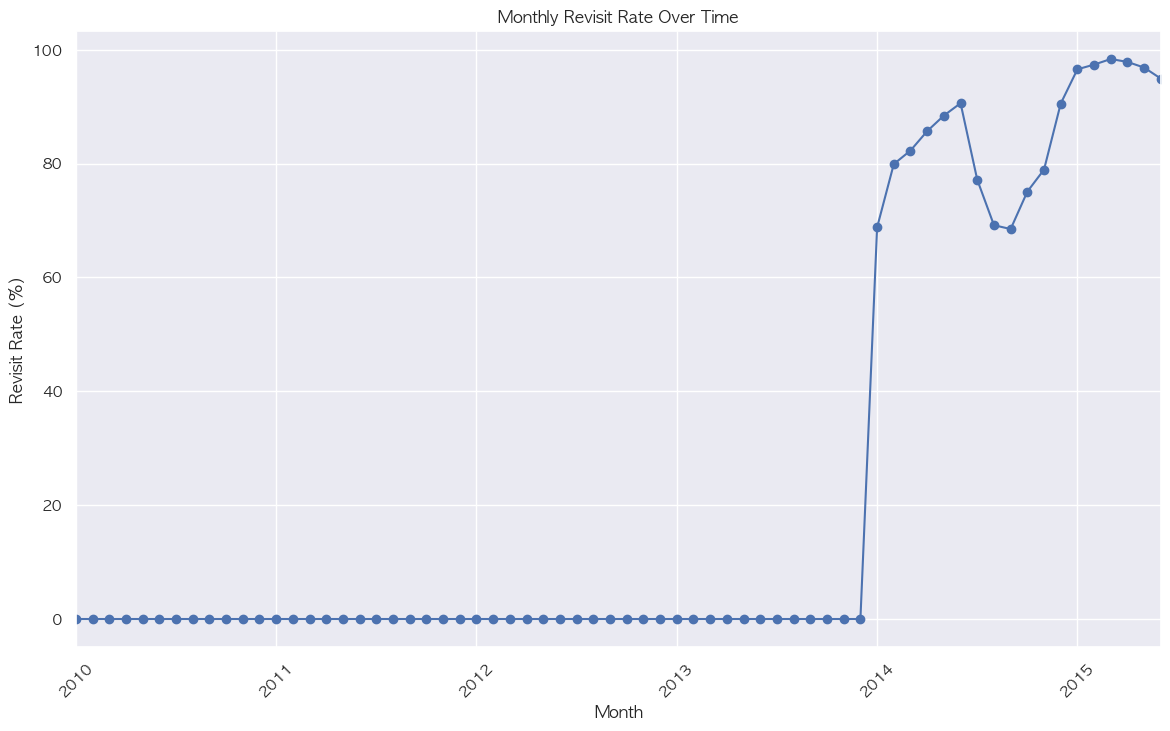

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

# merged_df에서 필요한 컬럼 추출
df = merged_df[['id', 'date_first_booking']]

# 첫 예약이 있는 사용자 추출
first_booking_users = df.dropna(subset=['date_first_booking'])

# 첫 예약 날짜를 월 단위로 추출
first_booking_users['first_booking_month'] = first_booking_users['date_first_booking'].dt.to_period('M')

# 월별로 다시 예약한 사용자 수 계산
repeat_booking_users = first_booking_users.groupby('id').filter(lambda x: len(x) > 1)
repeat_booking_users['first_booking_month'] = repeat_booking_users['date_first_booking'].dt.to_period('M')

monthly_revisit_rate = (
    repeat_booking_users.groupby('first_booking_month')['id'].nunique() /
    first_booking_users.groupby('first_booking_month')['id'].nunique()
) * 100

# NaN 값을 0으로 대체
monthly_revisit_rate = monthly_revisit_rate.fillna(0)

# 시각화
plt.figure(figsize=(14, 8))
monthly_revisit_rate.plot(kind='line', marker='o', color='b', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Revisit Rate (%)')
plt.title('Monthly Revisit Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


→ 재방문율이 2014년부터 발생한 것으로 보여, 보다 정확한 트렌드 파악을 위해 기간을 좁혀서 확인해봤다.

/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1771/1319790143.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_booking_users['first_booking_month'] = first_booking_users['date_first_booking'].dt.to_period('M')


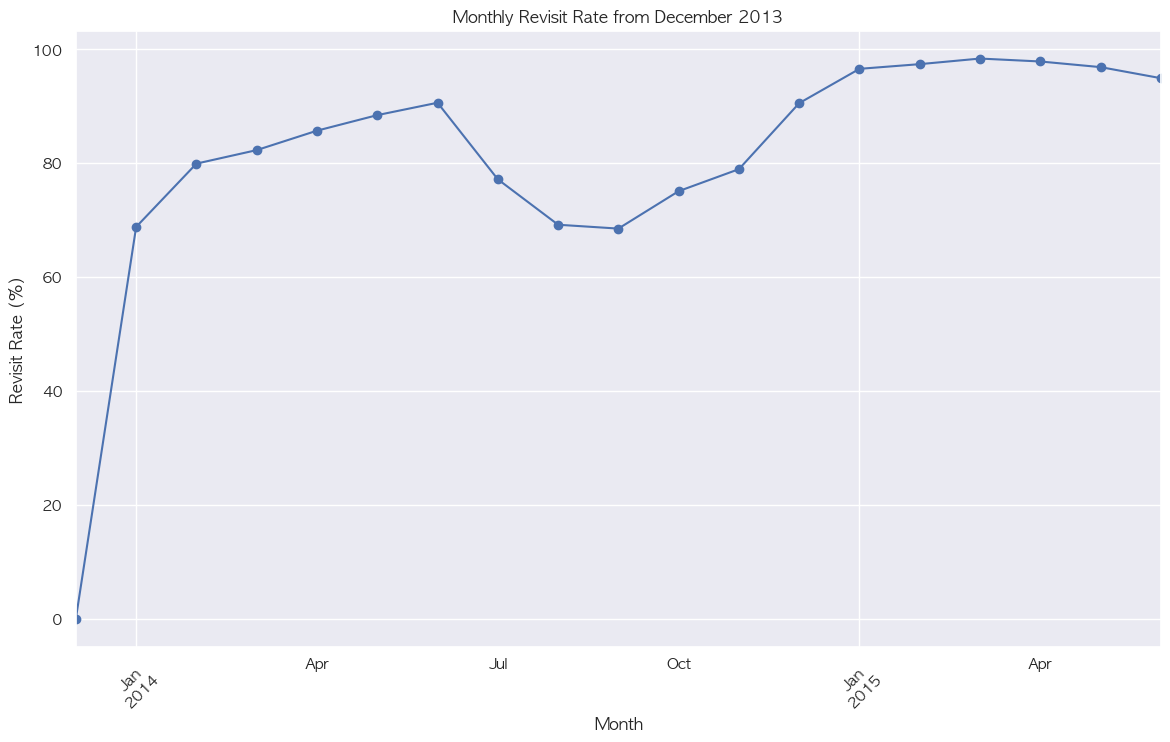

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# 필요한 컬럼 추출
df = merged_df[['id', 'date_first_booking']]

# 첫 예약이 있는 사용자 추출
first_booking_users = df.dropna(subset=['date_first_booking'])

# 첫 예약 날짜를 월 단위로 추출
first_booking_users['first_booking_month'] = first_booking_users['date_first_booking'].dt.to_period('M')

# 다시 예약한 사용자 추출
repeat_booking_users = first_booking_users.groupby('id').filter(lambda x: len(x) > 1)
repeat_booking_users['first_booking_month'] = repeat_booking_users['date_first_booking'].dt.to_period('M')

# 2013년 12월부터 데이터 필터링
first_booking_users = first_booking_users[first_booking_users['first_booking_month'] >= '2013-12']
repeat_booking_users = repeat_booking_users[repeat_booking_users['first_booking_month'] >= '2013-12']

# 월별 재방문율 계산
monthly_revisit_rate = (
    repeat_booking_users.groupby('first_booking_month')['id'].nunique() /
    first_booking_users.groupby('first_booking_month')['id'].nunique()
) * 100

# NaN 값을 0으로 대체
monthly_revisit_rate = monthly_revisit_rate.fillna(0)

# 시각화
plt.figure(figsize=(14, 8))
monthly_revisit_rate.plot(kind='line', marker='o', color='b', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Revisit Rate (%)')
plt.title('Monthly Revisit Rate from December 2013')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


- 2014년부터 발생한 재방문율은 전체적으로 증가하는 추세이지만 2014.06에 갑자기 감소하다가 다시 2014.09에 점점 증가하는 지점을 확인했다.
- 2015.01부터는 거의 변화를 보이고 있지는 않지만 2015.04부터 점점 감소하는 것으로 보인다.
<br>
<br>

2014년 6월
- 여름 휴가 시즌 시작: 북반구에서 여름 휴가 시즌이 시작되면서, 여행 계획을 미리 세운 사람들이 이미 예약을 완료했거나, 반대로 휴가 계획을 아직 세우지 않은 사람들이 많을 가능성이 있음
- 경제적 요인

2014년 9월
- 휴가 시즌 종료: 여름 휴가 시즌이 끝나고 가을로 접어들면서 다시 여행 계획을 세우는 사람들이 증가했을 수도 있음
- 프로모션 및 마케팅 캠페인: 에어비엔비가가 새로운 프로모션이나 마케팅 캠페인을 진행했을수도 있음

계절성
- 여름에는 장기 휴가를 떠나는 사용자가 많고, 가을에는 단기 여행을 떠나는 사용자가 증가할 수 있음

### 첫 예약률 (가입 -> 실제 에약)
신규 사용자 중 실제로 첫 예약을 확정한 사용자 비율

/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1771/1133988239.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account_created_month'] = df['date_account_created'].dt.to_period('M')
/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1771/1133988239.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_booking_users['first_booking_month'] = first_booking_users['date_first_booking'].dt.to_period('M')
/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1771/1133988239.p

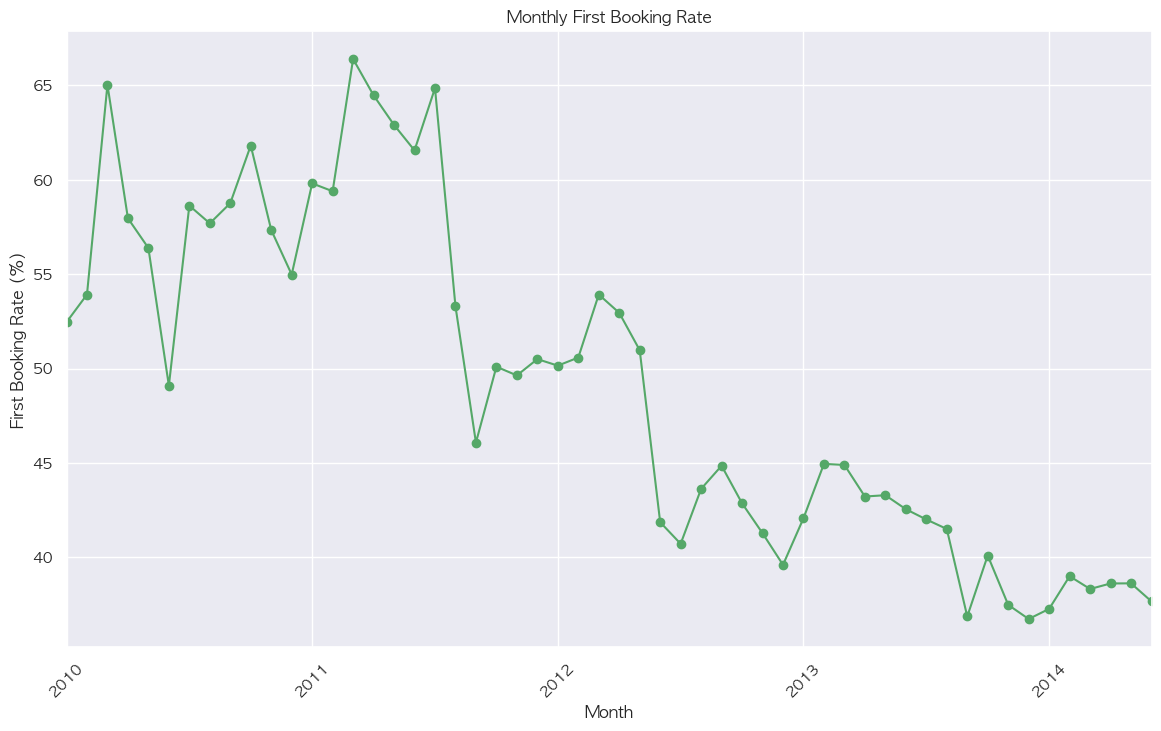

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

# 필요한 컬럼 추출
df = merged_df[['id', 'date_account_created', 'date_first_booking']]

# 첫 예약이 있는 사용자 추출
first_booking_users = df.dropna(subset=['date_first_booking'])

# 계정 생성 날짜를 월 단위로 추출
df['account_created_month'] = df['date_account_created'].dt.to_period('M')
first_booking_users['first_booking_month'] = first_booking_users['date_first_booking'].dt.to_period('M')

# first_booking_users 데이터프레임에 account_created_month 컬럼 추가
first_booking_users['account_created_month'] = first_booking_users['date_account_created'].dt.to_period('M')

# 월별 첫 예약률 계산
monthly_first_booking_rate = (
    first_booking_users.groupby('account_created_month')['id'].nunique() /
    df.groupby('account_created_month')['id'].nunique()
) * 100

# NaN 값을 0으로 대체
monthly_first_booking_rate = monthly_first_booking_rate.fillna(0)

# 시각화
plt.figure(figsize=(14, 8))
monthly_first_booking_rate.plot(kind='line', marker='o', color='g', linestyle='-')
plt.xlabel('Month')
plt.ylabel('First Booking Rate (%)')
plt.title('Monthly First Booking Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- 신규 가입자 중 실제로 첫 예약을 한 사용자의 비율은 해가 지날수록 감소하는 추세를 보였다.
- 2010년과 2011년 사이 잠시 감소했다가 다시 급격히 증가한 지점이 있다.
- 2011년과 2012년 사이 급격히 감소하는 지점이 있다.
- 이러한 변화에 대한 요인으로 어떤 것들이 연관되어 있을지 분석해봐야 겠다.
<br>
<br>

##### 1. 급격한 변화의 원인 (2010년-2012년)
급격한 증가 (2010년-2011년):
- 초기 마케팅 캠페인: 에어비엔비가 처음으로 대규모 마케팅 캠페인을 시작하면서 신규 가입자들의 예약률이 급격히 증가할 가능성이 있다.
- 미디어 노출: 초기 미디어의 긍정적인 리뷰와 기사들이 사용자 유입에 큰 영향을 미쳤을 가능성이 있다.
- 앱 론칭 : 2010.11에 에어비엔비가 애플리케이션을 론칭하고 '즉시 예약' 기능을 도입했다. 앱 론칭으로 인해 사용자들의 접근성과 편의성이 높아지면서 첫예약률이 급증했을 가능성이 있다.

급격한 감소 (2011년-2012년):
- 경쟁의 증가: 비슷한 서비스를 제공하는 경쟁 업체들이 등장하면서 사용자들이 다른 플랫폼으로 분산되었을 가능성이 있다.
- 서비스 문제: 초기 사용자들이 서비스 문제를 경험하면서 재예약을 꺼렸을 수 있다.

##### 2. 전체적인 감소 추세
포화 상태:
- 시장 포화: 초기의 급격한 성장은 초기 시장 침투 때문일 수 있으며, 시간이 지남에 따라 시장이 포화 상태에 이르렀을 수 있다.

사용자 행동 측면:
- 사용자 기대치: 시간이 지남에 따라 사용자들의 기대치가 높아지면서, 초기의 신규 사용자들이 재예약을 하지 않게 될 수 있다.
- 경제적 요인: 인플레이션, 여행에 대한 지출 감소 등 외부 경제 요인들이 영향을 미쳤을 수 있다.

### 신규 사용자 등록수

/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1771/2737328244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account_created_month'] = df['date_account_created'].dt.to_period('M')


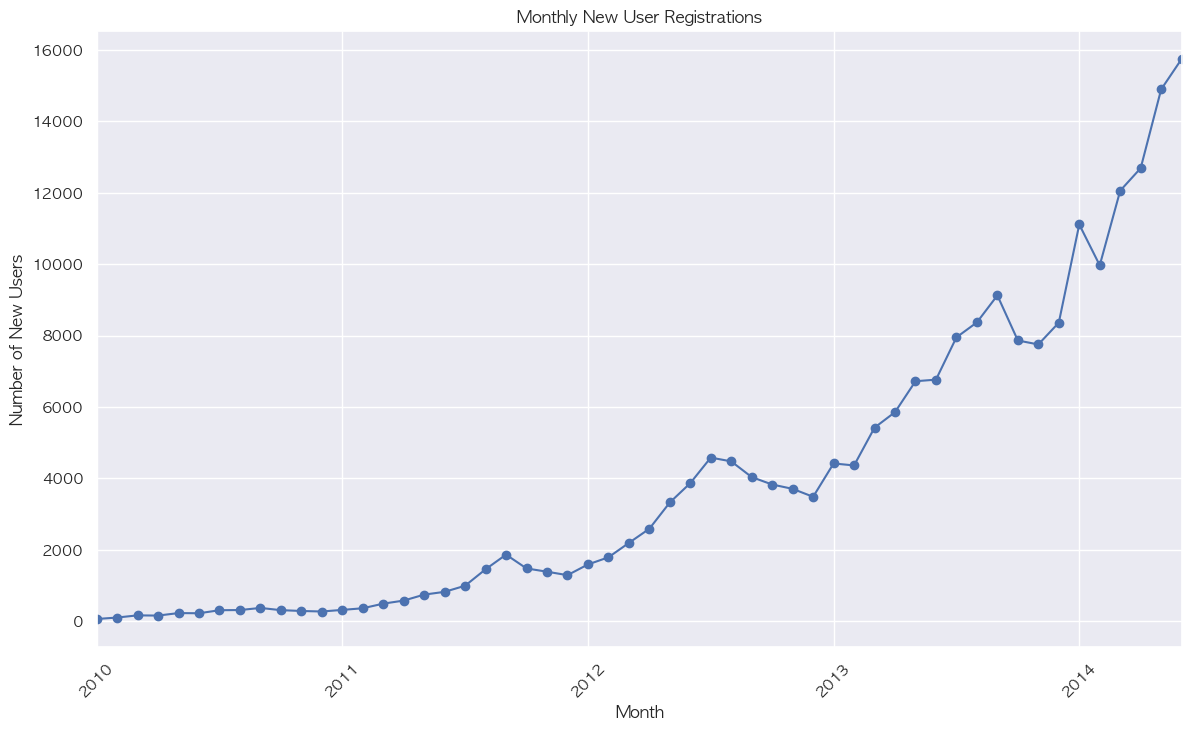

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# 필요한 컬럼 추출
df = merged_df[['id', 'date_account_created']]

# 계정 생성 날짜를 월 단위로 추출
df['account_created_month'] = df['date_account_created'].dt.to_period('M')

# 월별 신규 사용자 수 계산
monthly_new_users = df.groupby('account_created_month')['id'].nunique()

# 시각화
plt.figure(figsize=(14, 8))
monthly_new_users.plot(kind='line', marker='o', color='b', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of New Users')
plt.title('Monthly New User Registrations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- 해가 지남에 따라 에어비엔비 신규 가입자가 점점 증가하는 추세를 보였다.
- 2011년 말, 2012년말, 2013년 말에 갑자기 살짝 낮아지는 지점이 존재했다.
- 2014년에서 2015년에 신규 가입자 등록건수가 급격히 증가하는 것을 알 수 있다.

► 연말에 신규 가입자 등록건수가 줄어든 이유는?
- 휴가 시즌: 연말에는 크리스마스와 신년 휴가가 있음. 많은 사람들이 이 기간 동안 여행을 가거나 가족과 시간을 보내기 때문에 새로운 서비스에 가입할 시간이 적을 수 있다.
- 연말 쇼핑: 블랙 프라이데이와 크리스마스 쇼핑 시즌으로 인해 사람들은 쇼핑에 더 집중함. 이에 따라 새로운 서비스 가입에 대한 관심이 줄어들 수 있다.
- 연간 계획: 많은 기업과 개인이 연초에 새로운 계획을 세우는 경향이 있음. 따라서 새로운 서비스 가입이나 시작을 연초로 미루는 경우가 많을 수 있다.
- 추운 날씨: 추운 겨울 날씨로 인해 야외 활동이 줄어들고, 사람들이 집에 머무르는 시간이 늘어남. 이는 여행 관련 서비스 가입이 줄어드는 원인이 될 수 있다.

► 블랙 프라이데이와 여행의 관계?
https://travelweekly.co.uk/articles/58271/opinion-can-travel-capitalise-on-the-black-friday-phenomenon 


## 4-5. age_gender_df EDA

/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1771/3332132885.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=age_gender_df,


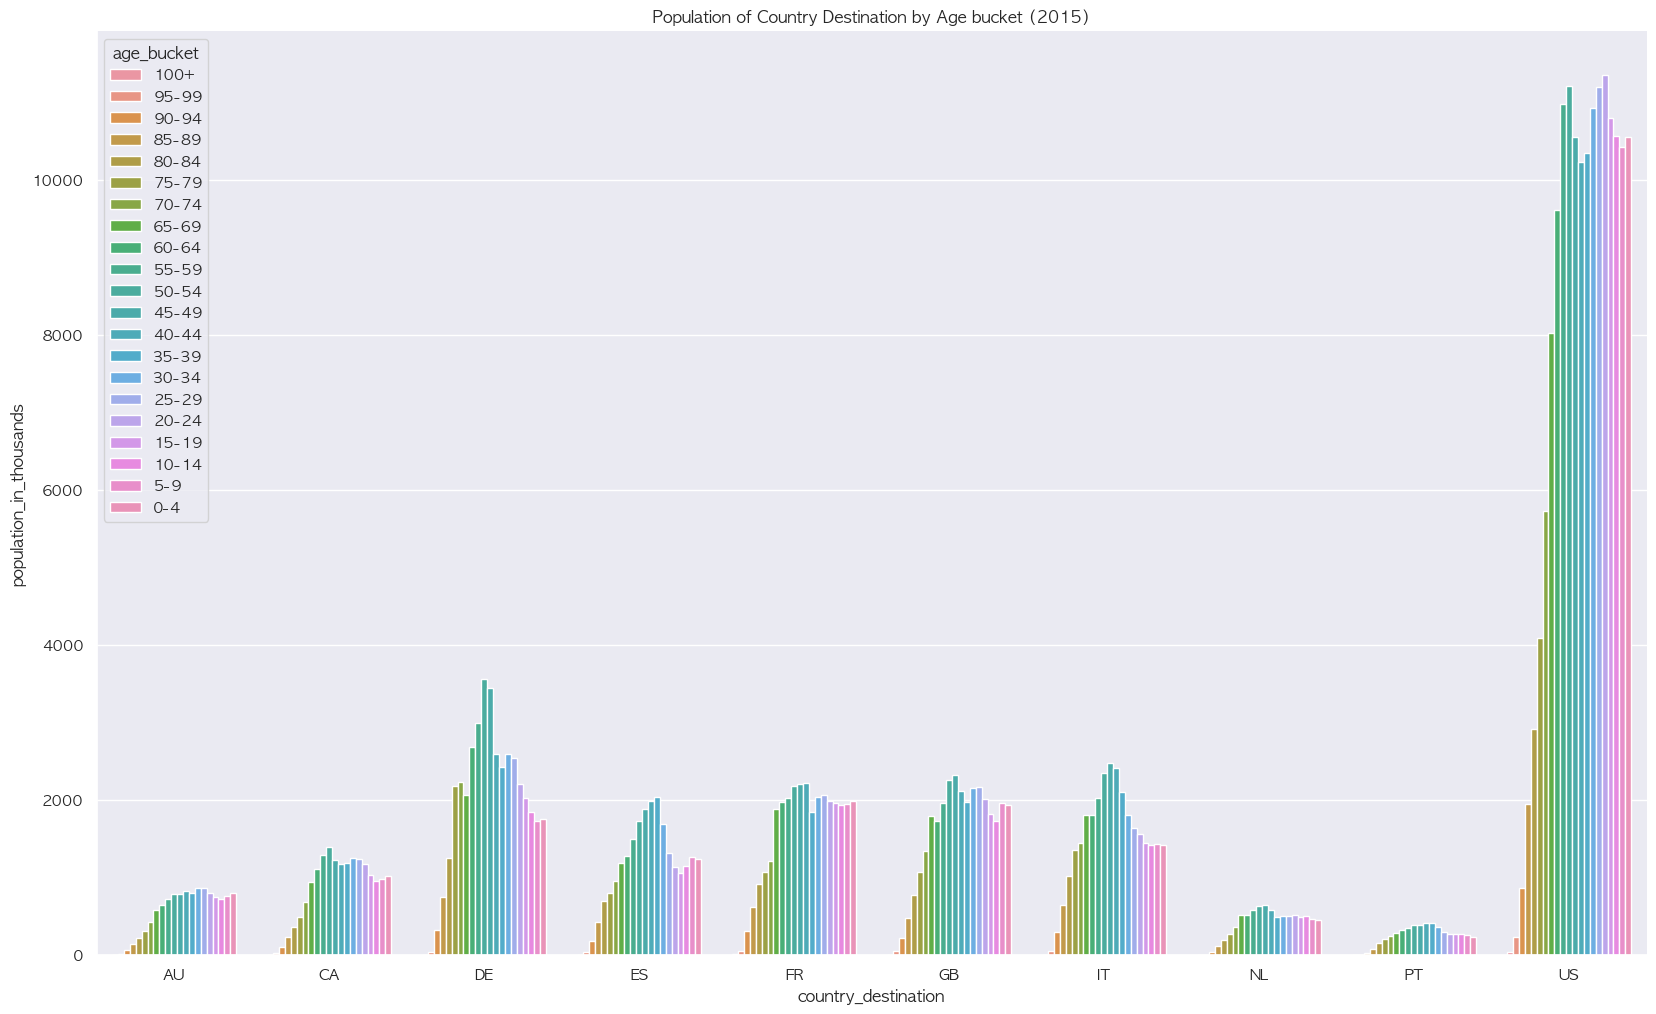

In [154]:
## 연령대에 따른 목적지 국가별 인구수 파악

fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
sns.barplot(data=age_gender_df,
            x="country_destination",
            y="population_in_thousands",
            hue='age_bucket',
            ci=None,
            ax=ax)
plt.title('Population of Country Destination by Age bucket (2015)')
sns.despine()

- 2015년 기준 연령대에 따른 목적지 국가별 사용자 인구를 파악한 결과, 미국(US)이 가장 많은 비중을 차지하고 모든 연령대의 사용자가 존재하는 것을 알 수 있었다.
- 목적지 국가로서 전체적으로 가장 적은 비중을 차지한 곳은 포르투갈(PT)이었다. 

/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1771/890557479.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=age_gender_df,


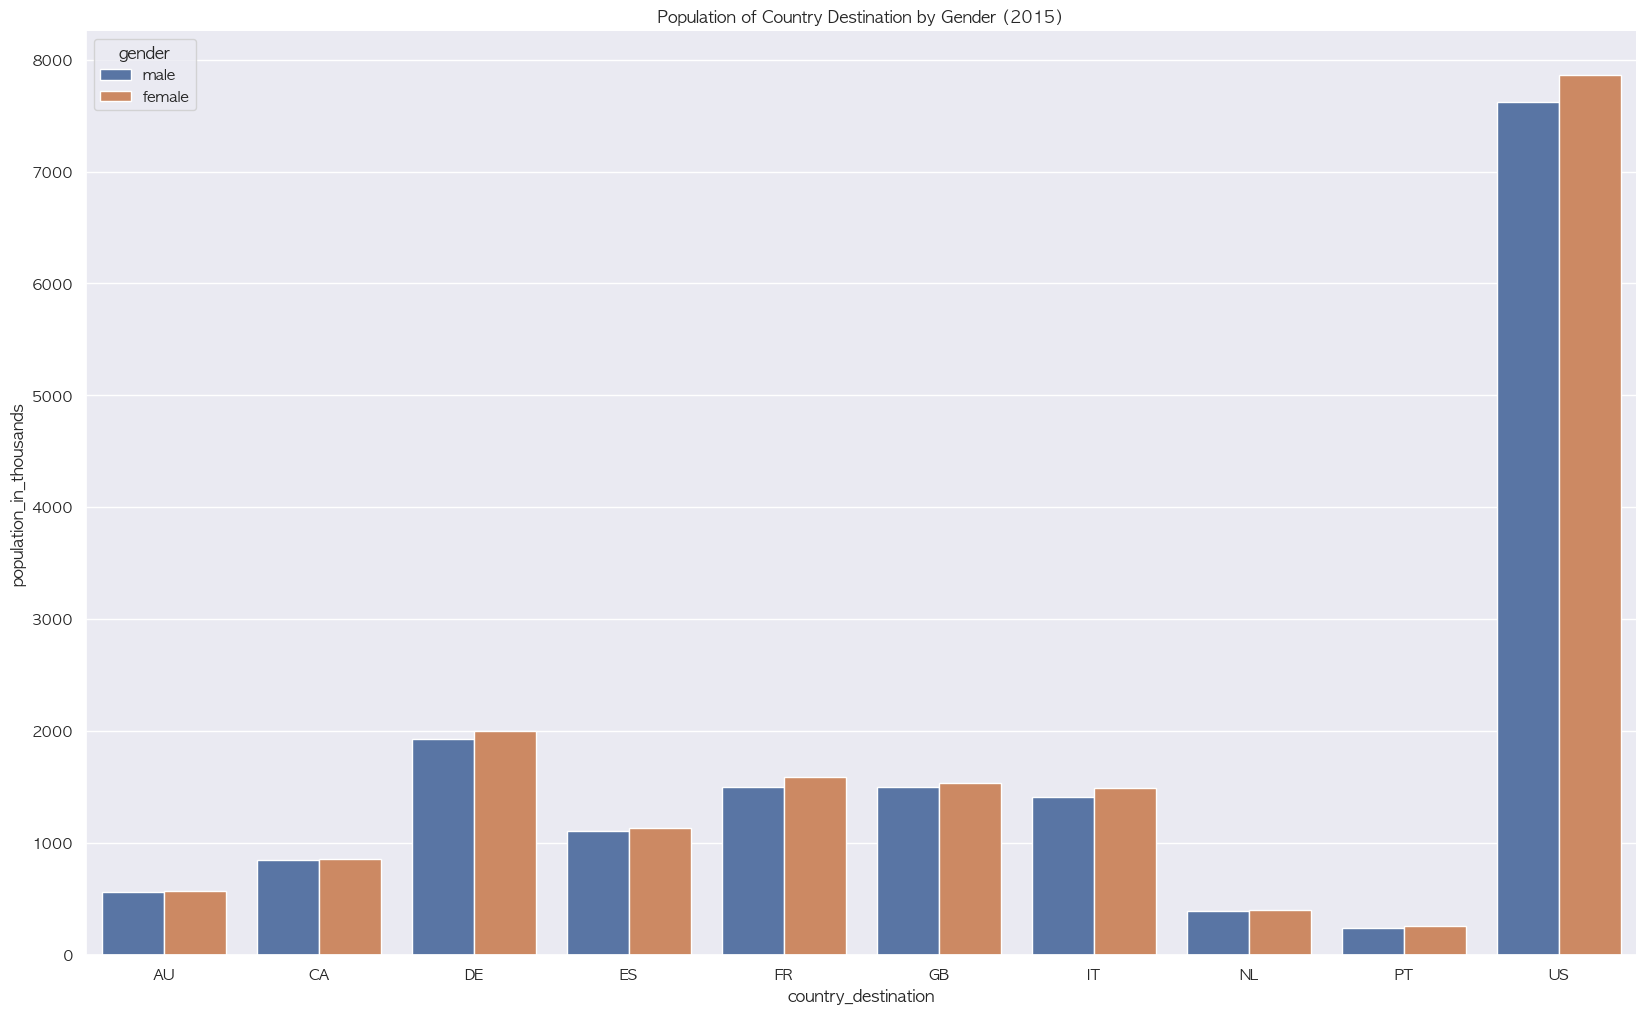

In [155]:
## 성별에 따른 목적지 국가별 인구수

fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
sns.barplot(data=age_gender_df,
            x="country_destination",
            y="population_in_thousands",
            hue='gender',
            ci=None,
            ax=ax)
plt.title('Population of Country Destination by Gender (2015)')
sns.despine()

- 목적지 국가로서 가장 많은 인구수를 차지했던 미국(US)은 성별간 차이를 거의 보이지 않았다. 그럼에도 불구하고 여성 사용자가 조금 더 많은 것을 알 수 있었다.
- 그래프에 따르면 전체 국가에서 성별간 차이는 거의 띄지 않는다. 그리고 여성 사용자가 조금 더 많은 것도 공통적으로 갖고 있는 특성임을 파악했다.

# 5. RFM 분석
사용자가 얼마를 지불했는지에 대한 정보를 알 수 없기 때문에 Monetary 값은 세션에 머무른 시간(secs_elapsed)로 대체해서 사용했다.

In [116]:
# 필요한 결합을 위해 'id'와 'user_id'가 같은 형식인지 확인
print(users_df.head())
print(sessions_df.head())

# 'user_id'가 users_df의 'id'와 동일한지 확인
sessions_df.rename(columns={'user_id': 'id'}, inplace=True)

# 사용자 데이터와 세션 데이터 결합
merged_df = pd.merge(users_df, sessions_df, on='id', how='left')

# 결합된 데이터의 기본 정보 확인
print(merged_df.info())
print(merged_df.head())

           id date_account_created timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28             2009-03-19                NaT   
1  820tgsjxq7           2011-05-25             2009-05-23                NaT   
2  4ft3gnwmtx           2010-09-28             2009-06-09         2010-08-02   
3  bjjt8pjhuk           2011-12-05             2009-10-31         2012-09-08   
4  87mebub9p4           2010-09-14             2009-12-08         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_

## 5-1. 최근성 (Recency)
사용자의 최근 활동 일자를 기준으로 최근성을 계산했다.

In [119]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677593 entries, 0 to 5677592
Data columns (total 21 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       object        
 1   date_account_created     datetime64[ns]
 2   timestamp_first_active   datetime64[ns]
 3   date_first_booking       datetime64[ns]
 4   gender                   object        
 5   age                      float64       
 6   signup_method            object        
 7   signup_flow              int64         
 8   language                 object        
 9   affiliate_channel        object        
 10  affiliate_provider       object        
 11  first_affiliate_tracked  object        
 12  signup_app               object        
 13  first_device_type        object        
 14  first_browser            object        
 15  country_destination      object        
 16  action                   object        
 17  action_type              ob

In [120]:
# 가장 최근 날짜를 기준으로 Recency 계산
most_recent_date = merged_df['date_account_created'].max()

# 사용자의 최근 활동 날짜 계산
last_activity_date = merged_df.groupby('id')['timestamp_first_active'].max()

# Recency 값 계산
recency = (most_recent_date - last_activity_date).dt.days.reset_index()
recency.columns = ['id', 'recency']
recency.head(10)

,id,recency
0,00023iyk9l,47
1,0005ytdols,330
2,000guo2307,703
3,000wc9mlv3,209
4,0012yo8hu2,357
5,001357912w,488
6,001nvbxsvp,357
7,001wyh0pz8,67
8,001xf4efvm,916
9,001y3jr7xc,647


## 5-2. 빈도 (Frequency)
사용자의 활동 빈도를 사용자 id 기준으로 계산했다.

In [121]:
# Frequency 값 계산
frequency = merged_df.groupby('id').size().reset_index()
frequency.columns = ['id', 'frequency']
frequency.head(10)

,id,frequency
0,00023iyk9l,40
1,0005ytdols,1
2,000guo2307,1
3,000wc9mlv3,1
4,0012yo8hu2,1
5,001357912w,1
6,001nvbxsvp,1
7,001wyh0pz8,90
8,001xf4efvm,1
9,001y3jr7xc,1


## 5-3. 금액 (Monetary)
사용자의 세션 경과 시간을 기준으로 계산했다

In [122]:
# Monetary 값 계산
monetary = merged_df.groupby('id')['secs_elapsed'].sum().reset_index()
monetary.columns = ['id', 'monetary']
monetary.head(10)

,id,monetary
0,00023iyk9l,867896.0
1,0005ytdols,0.0
2,000guo2307,0.0
3,000wc9mlv3,0.0
4,0012yo8hu2,0.0
5,001357912w,0.0
6,001nvbxsvp,0.0
7,001wyh0pz8,282965.0
8,001xf4efvm,0.0
9,001y3jr7xc,0.0


## 5-4. RFM 점수 계산

- 최근성(R)의 경우, 날짜간 차이가 클수록 최근에 이용하지 않았다는 의미이기 때문에 F, M과 달리 점수를 반대로 부여한다. 즉, 날짜 간 차이가 클수록 1점, 적을수록 5점을 부여하는 방식이다.

In [123]:
# RFM 데이터프레임 생성
rfm_df = recency.merge(frequency, on='id').merge(monetary, on='id')

# R, F, M 값을 각각 1~5 범위로 스케일링 (1이 가장 낮은 값, 5가 가장 높은 값)
rfm_df['R'] = pd.qcut(rfm_df['recency'], 5, labels=False, duplicates='drop') + 1
rfm_df['F'] = pd.qcut(rfm_df['frequency'].rank(method='first'), 5, labels=False) + 1
rfm_df['M'] = pd.qcut(rfm_df['monetary'].rank(method='first'), 5, labels=False) + 1

# RFM 스코어 계산
rfm_df['RFM_Score'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.head(10)

,id,recency,frequency,monetary,R,F,M,RFM_Score
0,00023iyk9l,47,40,867896.0,1,5,5,11
1,0005ytdols,330,1,0.0,3,1,1,5
2,000guo2307,703,1,0.0,5,1,1,7
3,000wc9mlv3,209,1,0.0,2,1,1,4
4,0012yo8hu2,357,1,0.0,3,1,1,5
5,001357912w,488,1,0.0,4,1,1,6
6,001nvbxsvp,357,1,0.0,3,1,1,5
7,001wyh0pz8,67,90,282965.0,1,5,4,10
8,001xf4efvm,916,1,0.0,5,1,1,7
9,001y3jr7xc,647,1,0.0,5,1,1,7


In [125]:
print(rfm_df['RFM_Score'].max())
print(rfm_df['RFM_Score'].min())

13
3


In [127]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         213451 non-null  object 
 1   recency    213451 non-null  int64  
 2   frequency  213451 non-null  int64  
 3   monetary   213451 non-null  float64
 4   R          213451 non-null  int64  
 5   F          213451 non-null  int64  
 6   M          213451 non-null  int64  
 7   RFM_Score  213451 non-null  int64  
 8   Segment    213451 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 14.7+ MB


## 5-5. RFM 점수 기반 고객 세분화

- rfm 총점의 최소 점수가 3점, 최대 점수가 13점인 것을 고려하여 3등분해서 세그먼트를 분류했다.

Segment
Mid-Value     132460
Low-Value      59665
High-Value     21326
Name: count, dtype: int64


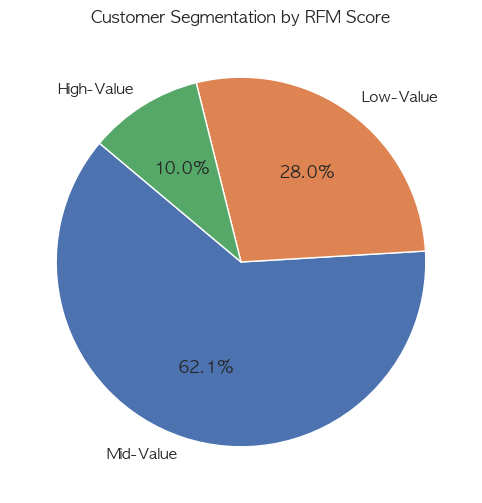

In [126]:
# RFM 스코어를 기반으로 고객 세분화
rfm_df['Segment'] = 'Low-Value'
rfm_df.loc[rfm_df['RFM_Score'] > 7, 'Segment'] = 'Mid-Value'
rfm_df.loc[rfm_df['RFM_Score'] > 11, 'Segment'] = 'High-Value'

# 세분화된 고객 그룹 확인
print(rfm_df['Segment'].value_counts())

# 세분화된 고객 그룹 시각화 (예: Pie Chart)
import matplotlib.pyplot as plt

segment_counts = rfm_df['Segment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Segmentation by RFM Score')
plt.show()

- 최근에 이용한 정도(R), 이용한 빈도수(F), 사용자가 세션에 머무른 시간(M)이 모두 큰 High-Value의 사용자들을 전체 중 10%정도밖에 차지하지 않는다는 것을 알 수 있었다.
- 그 다음으로 적은 비중을 차지하는 것은 R, F, M이 모두 낮은 Low-Value의 사용자들이었으며
- 가장 많은 비중을 차지하는 것은 Mid-Value의 사용자들이었다.

→ 조금 더 세분화해서 사용자들을 구분해보려고 한다. R, F, M 각각의 최소 점수인 1과 최대 점수인 5의 중간값인 3을 기준으로 구분했다. R, F, M을 합한 전체 점수를 보는 것이 아니라 R, F, M 각각의 관점에 대해서 살펴보았다.

In [128]:
# 조건에 따라 segment를 생성
def segment_customer(row):
    r = row['R']
    f = row['F']
    m = row['M']
    
    if r >= 3 and f >= 3 and m >= 3:
        return '핵심 가치 고객'
    elif r < 3 and f >= 3 and m >= 3:
        return '핵심 충성 고객'
    elif r >= 3 and f < 3 and m >= 3:
        return '핵심 잠재 고객'
    elif r >= 3 and f >= 3 and m < 3:
        return '핵심 위험 고객'
    elif r >= 3 and f < 3 and m < 3:
        return '일반 가치 고객'
    elif r < 3 and f >= 3 and m < 3:
        return '일반 충성 고객'
    elif r < 3 and f < 3 and m >= 3:
        return '일반 잠재 고객'
    elif r < 3 and f < 3 and m < 3:
        return '일반 위험 고객'

# 사용자 세그먼트 컬럼 추가
rfm_df['segment'] = rfm_df.apply(segment_customer, axis=1)

rfm_df

,id,recency,frequency,monetary,R,F,M,RFM_Score,Segment,segment
0,00023iyk9l,47,40,867896.0,1,5,5,11,Mid-Value,핵심 충성 고객
1,0005ytdols,330,1,0.0,3,1,1,5,Low-Value,일반 가치 고객
2,000guo2307,703,1,0.0,5,1,1,7,Low-Value,일반 가치 고객
3,000wc9mlv3,209,1,0.0,2,1,1,4,Low-Value,일반 위험 고객
4,0012yo8hu2,357,1,0.0,3,1,1,5,Low-Value,일반 가치 고객
...,...,...,...,...,...,...,...,...,...,...
213446,zzysuoqg6x,173,3,1731.0,2,4,4,10,Mid-Value,핵심 충성 고객
213447,zzyt9q2s9k,443,1,0.0,4,4,4,12,High-Value,핵심 가치 고객
213448,zzywmcn0jv,129,51,2149949.0,2,5,5,12,High-Value,핵심 충성 고객
213449,zzyx3uud3s,569,1,0.0,4,4,4,12,High-Value,핵심 가치 고객


(시각화에서 에러 뜸..)

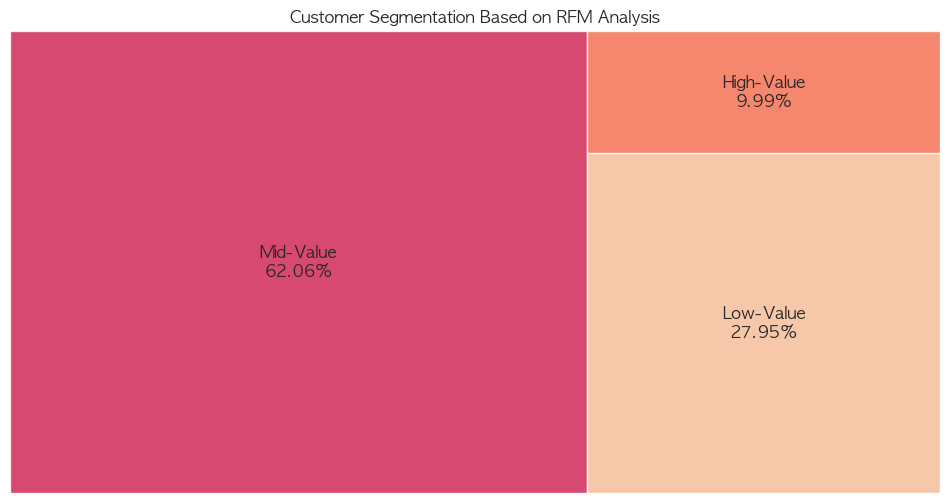

In [149]:
## 사용자 세그먼트 시각화

import squarify

# 각 고객 그룹별 비율 계산
group_counts = rfm_df['Segment'].value_counts()
group_percent = (group_counts / group_counts.sum()) * 100

# 트리맵 그리기
plt.figure(figsize=(12, 6))
squarify.plot(sizes=group_counts, 
              label=[f'{label}\n{value:.2f}%' for label, value in zip(group_percent.index, group_percent)],
              alpha=0.8)

plt.axis('off')
plt.title('Customer Segmentation Based on RFM Analysis')
plt.show()